In [105]:
import pandas as pd
data = pd.read_csv('AIP data.csv', index_col=0)
pd.options.display.max_columns = None

In [106]:
df_vix = pd.read_csv("prices-VIX_2000_2021.csv",sep=',',header=0,index_col=0,parse_dates=[0])
df_vix.drop(['High','Low','Close','Adj Close','Volume'], axis=1,inplace = True)
df_vix.rename(columns={"Open": "vix_Open"},inplace = True)
df_vix.drop(df_vix.loc[df_vix.index <'2000-09-01',:].index,inplace=True)

df_dow = pd.read_csv("prices-DOWIA_2000_2021.csv",sep=',',header=0,index_col=0,parse_dates=[0])
df_dow.drop(['High','Low','Close','Adj Close','Volume'], axis=1,inplace = True)
df_dow.rename(columns={"Open": "dow_Open"},inplace = True)
df_dow.drop(df_dow.loc[df_dow.index <'2000-09-01',:].index,inplace=True)

df_gold = pd.read_csv("prices-gold_2000_2021.csv",sep=',',header=0,index_col=0,parse_dates=[0])
df_gold.drop(['High','Low','Close','Adj Close','Volume'], axis=1,inplace = True)
df_gold.drop(df_gold.loc[df_gold.index <'2000-09-01',:].index,inplace=True)
df_gold.rename(columns={"Open": "gold_Open"},inplace = True)

df_sp = pd.read_csv("prices-S_P500_2000_2021.csv",sep=',',header=0,index_col=0,parse_dates=[0])
df_sp.drop(['High','Low','Close','Adj Close','Volume'], axis=1,inplace = True)
df_sp.rename(columns={"Open": "sp_Open"},inplace = True)
df_sp.drop(df_sp.loc[df_sp.index <'2000-09-01',:].index,inplace=True)

df_oil = pd.read_csv("prices-crude-oil_2000_2021.csv",sep=',',header=0,index_col=0,parse_dates=[0])
df_oil.drop(['High','Low','Close','Adj Close','Volume'], axis=1,inplace = True)
df_oil.rename(columns={"Open": "oil_Open"},inplace = True)
df_oil.drop(df_oil.loc[df_oil.index <'2000-09-01',:].index,inplace=True)

df_final = df_vix
df_final = df_final.merge(df_gold, how='inner', on='Date')
df_final = df_final.merge(df_dow, how='inner', on='Date')
df_final = df_final.merge(df_sp, how='inner', on='Date')
df_final = df_final.merge(df_oil, how='inner', on='Date')
df_final

vix_Open    gold_Open      dow_Open      sp_Open   oil_Open
Date                                                                    
2000-09-01  16.809999   277.000000  11219.540039  1517.680054  33.049999
2000-09-05  19.180000   275.799988  11221.759766  1520.770020  33.950001
2000-09-06  19.700001   274.200012  11253.580078  1507.079956  33.990002
2000-09-07  20.469999   274.000000  11316.009766  1492.250000  34.500000
2000-09-08  18.809999   273.299988  11261.719727  1502.510010  34.549999
...               ...          ...           ...          ...        ...
2021-02-22  24.459999  1784.000000  31381.119141  3885.550049  58.880001
2021-02-23  22.820000  1809.599976  31501.890625  3857.070068  62.160000
2021-02-24  23.760000  1805.800049  31499.750000  3873.709961  61.290001
2021-02-25  21.730000  1801.500000  31955.939453  3915.800049  63.389999
2021-02-26  28.730000  1768.099976  31401.289062  3839.659912  63.459999

[5103 rows x 5 columns]

In [107]:
# Time frequncy - month
df_list = []
df_listname=[]
for i in sorted(data['DataSeries'].unique()):
    temp=0
    
    df = data.loc[(data['DataSeries']==i),:]
    
    #production
    if 17 not in df['EconomicVariableID'].unique():
        continue
        
    # No SubCommodity mean total
    if 'No SubCommodity' not in df['SubcommodityName'].unique():
        continue
        
    # PhysicalAttributeDesc
    if 'Chilled' in df['PhysicalAttributeDesc'].unique():
        continue
    if 'Frozen' in df['PhysicalAttributeDesc'].unique():
        continue
            
        
    # UtilizationPractice
    print(df['UtilizationPracticeID'].unique())
    if 1 not in df['UtilizationPracticeID'].unique() and 16 not in df['UtilizationPracticeID'].unique() and 751 not in df['UtilizationPracticeID'].unique():
        continue
        
    # month
    if 11 in df['TimeFrequencyID'].unique():
        
        temp = df.drop(df.loc[df['TimeFrequencyID']!=11,:].index)
        
        # country
        if 1 in temp['GeographyTypeID'].unique():
        
            temp = temp.drop(temp.loc[temp['GeographyTypeID']!=1,:].index)
            
            # US
            if 'US TOTAL' in temp['State'].unique():
                
                temp = temp.drop(temp.loc[temp['State']!='US TOTAL',:].index)
                print(temp.columns)
        
#                 print(temp['TimeFrequencyID'].unique())
                
                for u in temp['UnitID'].unique(): 
                    # unitfilter
                    if 9 in temp['UnitID'].unique() and (10 in temp['UnitID'].unique() or 181 in temp['UnitID'].unique()) and u != 9:
                        continue
                            
        #             print('*********')
                    df = temp.loc[temp['UnitID']==u,:].copy()
        #             print(df)
                    table_name = df.iloc[1,2] + '_' + df.iloc[1,7] + '_'  + df.iloc[1,-2]
                    
                    df = df[['Date','Value']].set_index('Date')
                    df.rename(columns = {'Value':table_name}, inplace = True)
                    df_list.append(df[~df.index.duplicated(keep='first')])
                    df_listname.append(table_name)

[1]
Index(['DataSeries', 'CommodtiyID', 'CommodityName', 'SubcommodityName',
       'GroupID', 'GroupName', 'EconomicVariableID', 'EconomicVariableType',
       'DataSourceID', 'DataSource', 'PhysicalAttributeTypeID',
       'PhysicalAttributeType', 'PhysicalAttributeDesc',
       'UtilizationPracticeID', 'UtilizationPractice', 'ProductionPracticeID',
       'ProductionPractice', 'TimeFrequencyID', 'TimeFrequency', 'Date',
       'GeographyID', 'GeographyTypeID', 'GeographyTypeName', 'City', 'County',
       'State', 'Region', 'Country', 'UnitID', 'UnitName', 'Value'],
      dtype='object')
[1]
Index(['DataSeries', 'CommodtiyID', 'CommodityName', 'SubcommodityName',
       'GroupID', 'GroupName', 'EconomicVariableID', 'EconomicVariableType',
       'DataSourceID', 'DataSource', 'PhysicalAttributeTypeID',
       'PhysicalAttributeType', 'PhysicalAttributeDesc',
       'UtilizationPracticeID', 'UtilizationPractice', 'ProductionPracticeID',
       'ProductionPractice', 'TimeFrequencyID', 

      dtype='object')
[751]
Index(['DataSeries', 'CommodtiyID', 'CommodityName', 'SubcommodityName',
       'GroupID', 'GroupName', 'EconomicVariableID', 'EconomicVariableType',
       'DataSourceID', 'DataSource', 'PhysicalAttributeTypeID',
       'PhysicalAttributeType', 'PhysicalAttributeDesc',
       'UtilizationPracticeID', 'UtilizationPractice', 'ProductionPracticeID',
       'ProductionPractice', 'TimeFrequencyID', 'TimeFrequency', 'Date',
       'GeographyID', 'GeographyTypeID', 'GeographyTypeName', 'City', 'County',
       'State', 'Region', 'Country', 'UnitID', 'UnitName', 'Value'],
      dtype='object')
[751]
Index(['DataSeries', 'CommodtiyID', 'CommodityName', 'SubcommodityName',
       'GroupID', 'GroupName', 'EconomicVariableID', 'EconomicVariableType',
       'DataSourceID', 'DataSource', 'PhysicalAttributeTypeID',
       'PhysicalAttributeType', 'PhysicalAttributeDesc',
       'UtilizationPracticeID', 'UtilizationPractice', 'ProductionPracticeID',
       'ProductionPrac

In [108]:
# sort by name

df_list = [x for _,x in sorted(zip(df_listname,df_list))]

<AxesSubplot:>

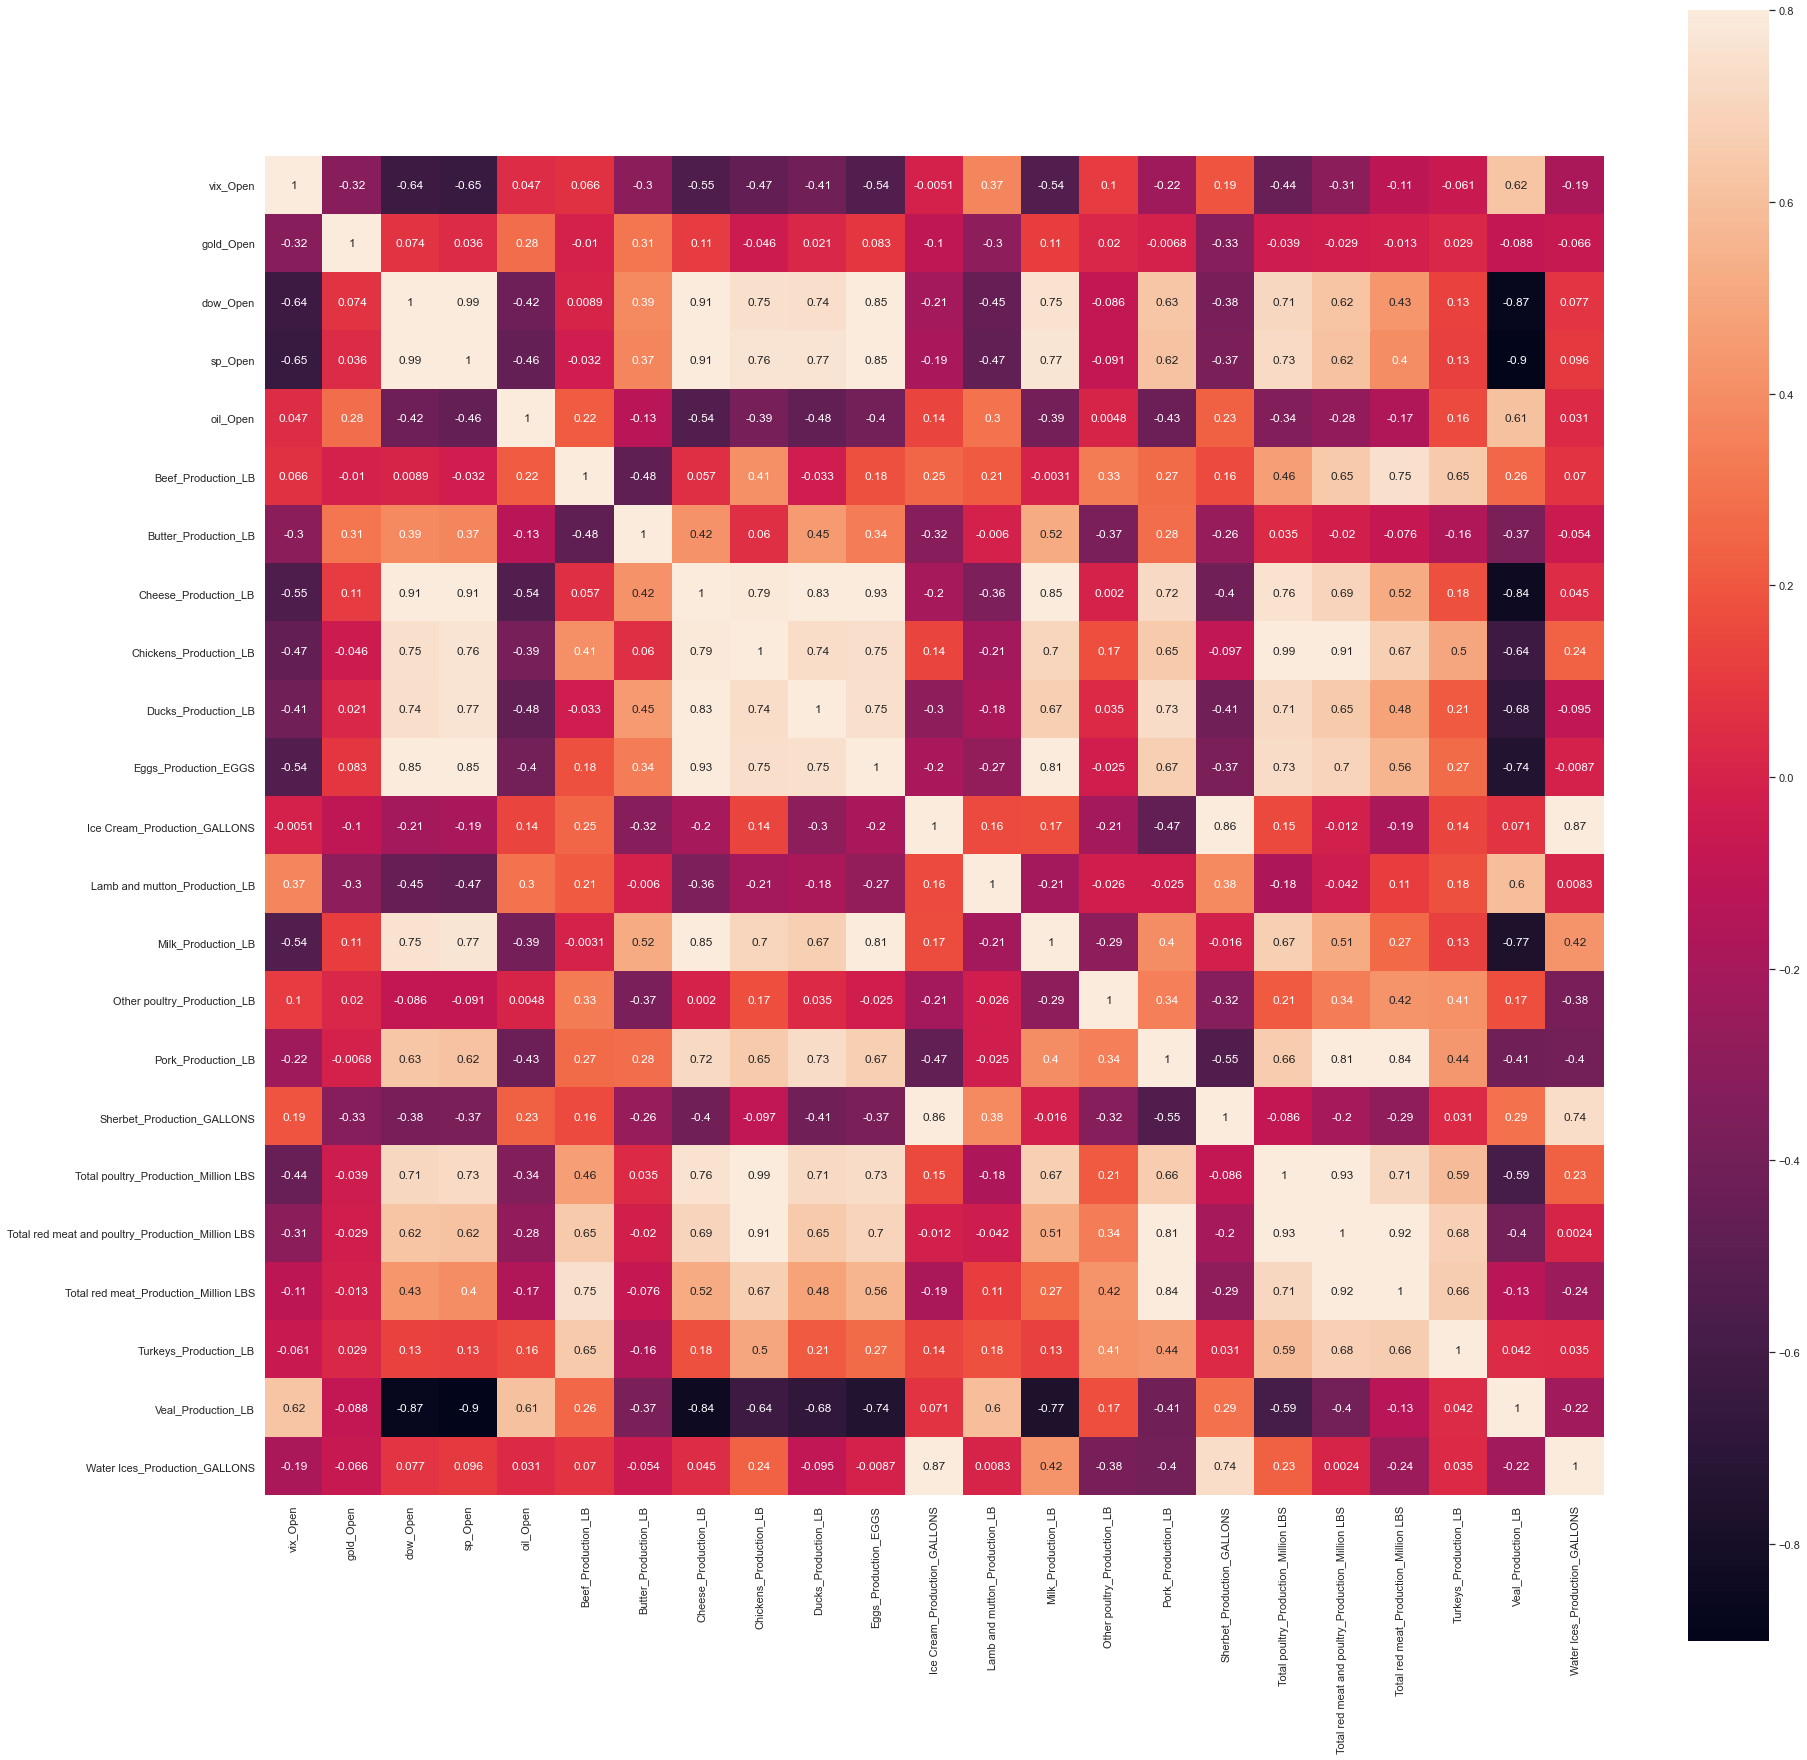

In [109]:
# heat map
import seaborn as sns
sns.set(rc={'figure.figsize':(30,30)})
sns.set(font_scale=1)
for i in range(len(df_list)):
    df_list[i].index = pd.to_datetime(df_list[i].index)
    df_final = df_final.merge(df_list[i], how='inner', on='Date')
sns.heatmap(df_final.corr(), vmax=.8, square=True, annot=True)    

In [110]:
df_final.columns

Index(['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Beef_Production_LB', 'Butter_Production_LB', 'Cheese_Production_LB',
       'Chickens_Production_LB', 'Ducks_Production_LB', 'Eggs_Production_EGGS',
       'Ice Cream_Production_GALLONS', 'Lamb and mutton_Production_LB',
       'Milk_Production_LB', 'Other poultry_Production_LB',
       'Pork_Production_LB', 'Sherbet_Production_GALLONS',
       'Total poultry_Production_Million LBS',
       'Total red meat and poultry_Production_Million LBS',
       'Total red meat_Production_Million LBS', 'Turkeys_Production_LB',
       'Veal_Production_LB', 'Water Ices_Production_GALLONS'],
      dtype='object')

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
#import adkt for taking roling avg
from adtk.transformer import DoubleRollingAggregate
from adtk.visualization import plot

# VIX OPEN Outlier points

In [112]:
scaler = MinMaxScaler()
X1 = pd.DataFrame(index = df_final.index, columns = ['vix_Open'], data = scaler.fit_transform(df_final[['vix_Open']]))

VIX Open Scaled
Date                       
2008-02-01         0.000000
2008-04-01         0.000000
2008-05-01         0.000000
2008-07-01         0.022165
2008-08-01         0.023349

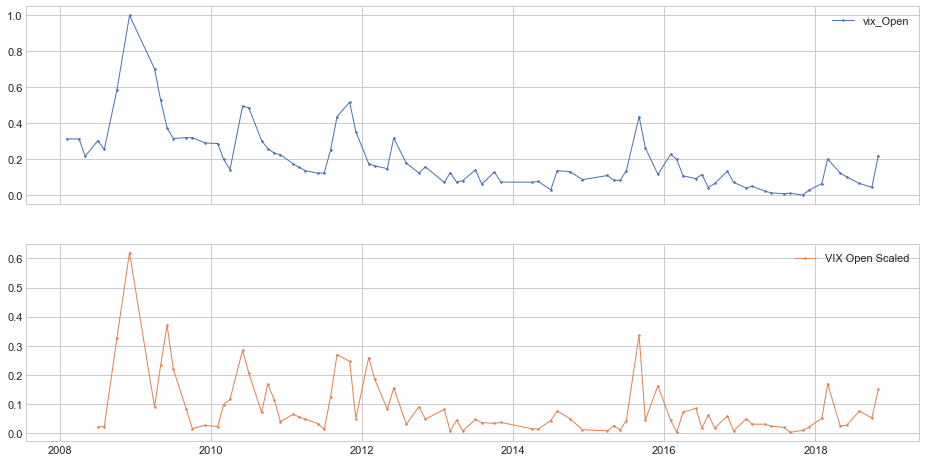

In [113]:
s_transformed = DoubleRollingAggregate(
    agg="mean", 
    window=(3,1), #The tuple specifies the left window to be 3, and right window to be 1
    diff="l1").transform(X1["vix_Open"]).rename("VIX Open Scaled")


plot(pd.concat([X1["vix_Open"], s_transformed], axis=1), ts_linewidth=1, ts_markersize=3);

SV = s_transformed.to_frame()

SV['VIX Open Scaled'] = SV['VIX Open Scaled'].fillna(0)
SV.head(5)

In [114]:
'''class sklearn.ensemble.IsolationForest(*, n_estimators=100, max_samples='auto', 
contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, 
verbose=0, warm_start=False)'''


modelv=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
#XV = pd.DataFrame(index = X1.index, columns = ["vix_Open"], data = X1["vix_Open"])
modelv.fit(SV)
X1['scores']=modelv.decision_function(SV)
X1['anomaly']=modelv.predict(SV)

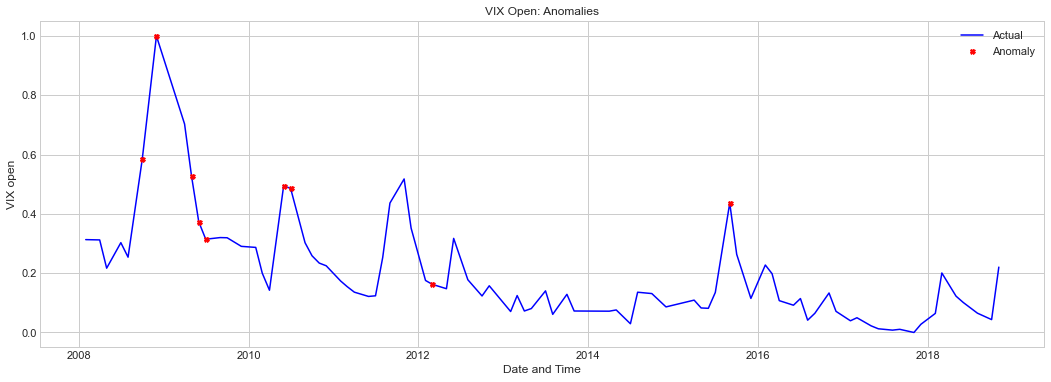

In [115]:
# visualization
av = X1.loc[X1['anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X1.index, X1['vix_Open'], color='blue', label='Actual')
_ = plt.plot(av.index, av['vix_Open'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('VIX open')
_ = plt.title('VIX Open: Anomalies')
_ = plt.legend(loc='best')
plt.show();



In [116]:
outliers_counter = len(X1[X1['vix_Open'] > 0.4])
print("Total outlier points found by IF: ",outliers_counter)
print("Accuracy percentage:", 100*list(X1['anomaly']).count(-1)/(outliers_counter),"%")

Total outlier points found by IF:  9
Accuracy percentage: 100.0 %


In [117]:
len(X1[X1['anomaly'] == -1])

9

In [118]:
X1.head(5)

vix_Open    scores  anomaly
Date                                   
2008-02-01  0.313141  0.020557        1
2008-04-01  0.312155  0.020557        1
2008-05-01  0.216851  0.020557        1
2008-07-01  0.302881  0.164104        1
2008-08-01  0.253946  0.164023        1

# DOWIA OPEN Outlier points

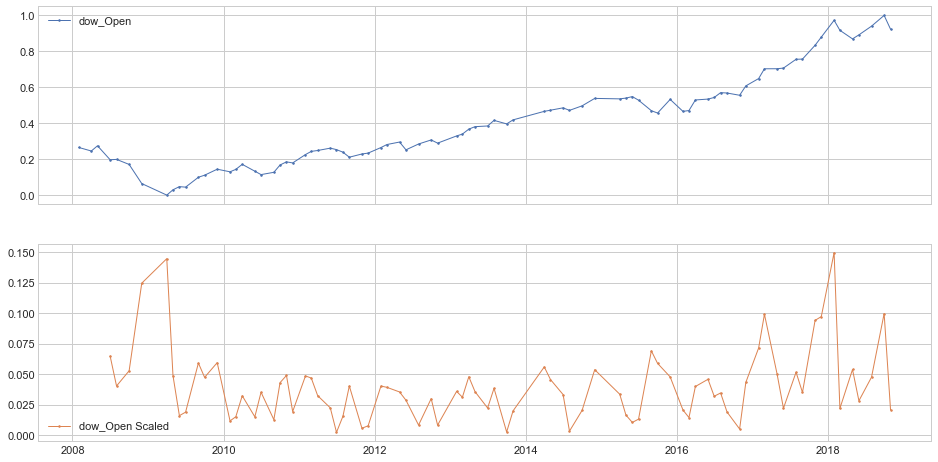

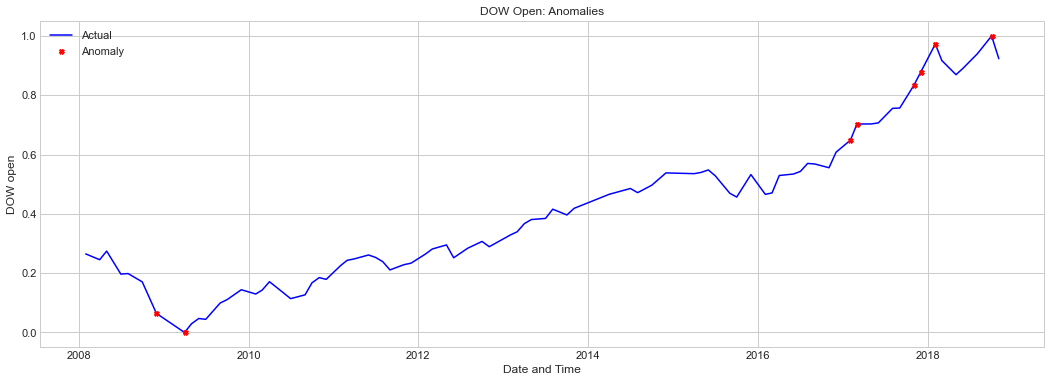

In [119]:
X2 = pd.DataFrame(index = df_final.index, columns = ["dow_Open"], data = scaler.fit_transform(df_final[["dow_Open"]]))

s_transformed = DoubleRollingAggregate(
    agg="mean", 
    window=(3,1), #The tuple specifies the left window to be 3, and right window to be 1
    diff="l1").transform(X2["dow_Open"]).rename("dow_Open Scaled")


plot(pd.concat([X2["dow_Open"], s_transformed], axis=1), ts_linewidth=1, ts_markersize=3);

SD = s_transformed.to_frame()

SD['dow_Open Scaled'] = SD['dow_Open Scaled'].fillna(0)


modeld=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
#XV = pd.DataFrame(index = X1.index, columns = ["vix_Open"], data = X1["vix_Open"])
modeld.fit(SD)
X2['scores']=modeld.decision_function(SD)
X2['anomaly']=modeld.predict(SD)

# visualization
ad = X2.loc[X2['anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X2.index, X2['dow_Open'], color='blue', label='Actual')
_ = plt.plot(ad.index, ad['dow_Open'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('DOW open')
_ = plt.title('DOW Open: Anomalies')
_ = plt.legend(loc='best')
plt.show();



In [120]:
outliers_counter = len(X2[X2['dow_Open'] > 0.8])
print("Total outlier points found by IF: ",outliers_counter)
print("Accuracy percentage:", 100*list(X2['anomaly']).count(-1)/(outliers_counter),"%")

Total outlier points found by IF:  9
Accuracy percentage: 88.88888888888889 %


# GOLD OPEN Outlier points

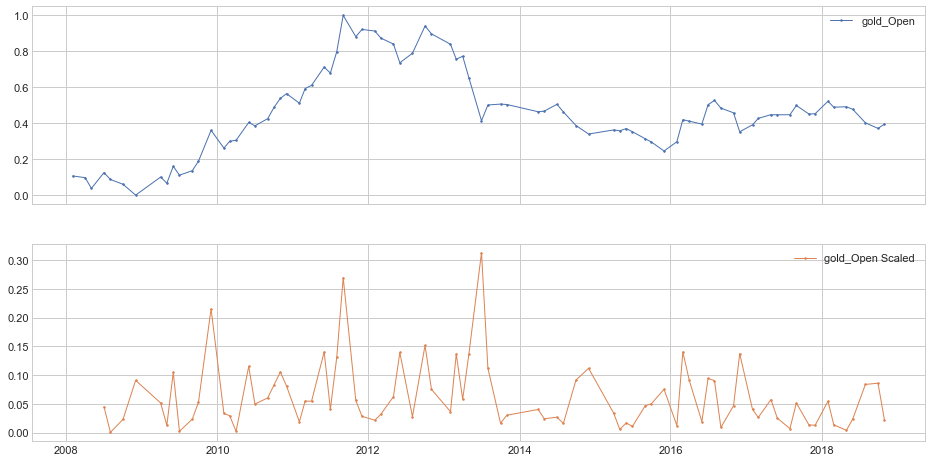

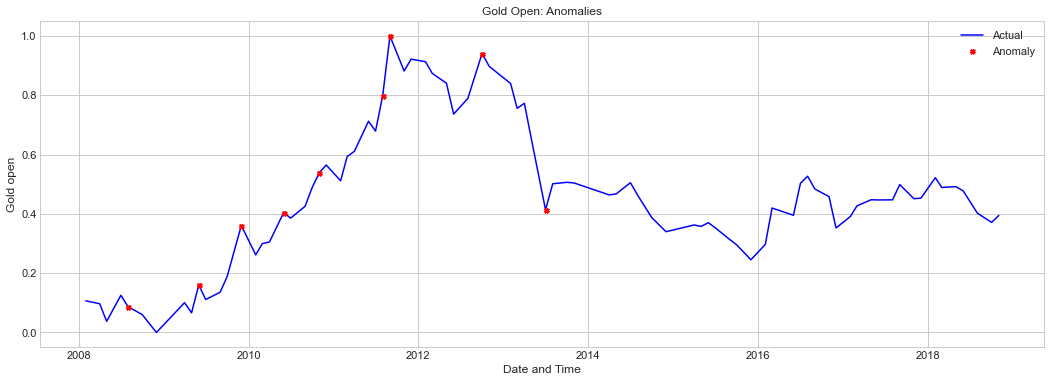

In [121]:
X3 = pd.DataFrame(index = df_final.index, columns = ["gold_Open"], 
                  data = scaler.fit_transform(df_final[["gold_Open"]]))

s_transformed = DoubleRollingAggregate(
    agg="mean", 
    window=(3,1), #The tuple specifies the left window to be 3, and right window to be 1
    diff="l1").transform(X3["gold_Open"]).rename("gold_Open Scaled")


plot(pd.concat([X3["gold_Open"], s_transformed], axis=1), ts_linewidth=1, ts_markersize=3);

SG = s_transformed.to_frame()

SG['gold_Open Scaled'] = SG['gold_Open Scaled'].fillna(0)


modelg=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
#XV = pd.DataFrame(index = X1.index, columns = ["vix_Open"], data = X1["vix_Open"])
modelg.fit(SG)
X3['scores']=modelg.decision_function(SG)
X3['anomaly']=modelg.predict(SG)

# visualization
ag = X3.loc[X3['anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X3.index, X3['gold_Open'], color='blue', label='Actual')
_ = plt.plot(ag.index, ag['gold_Open'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Gold open')
_ = plt.title('Gold Open: Anomalies')
_ = plt.legend(loc='best')
plt.show();



In [122]:
outliers_counter = len(X3[X3['gold_Open'] > 0.8])
print("Total outlier points found by IF: ",outliers_counter)
print("Accuracy percentage:", 100*list(X3['anomaly']).count(-1)/(outliers_counter),"%")

Total outlier points found by IF:  9
Accuracy percentage: 100.0 %


# S&P OPEN Outlier points

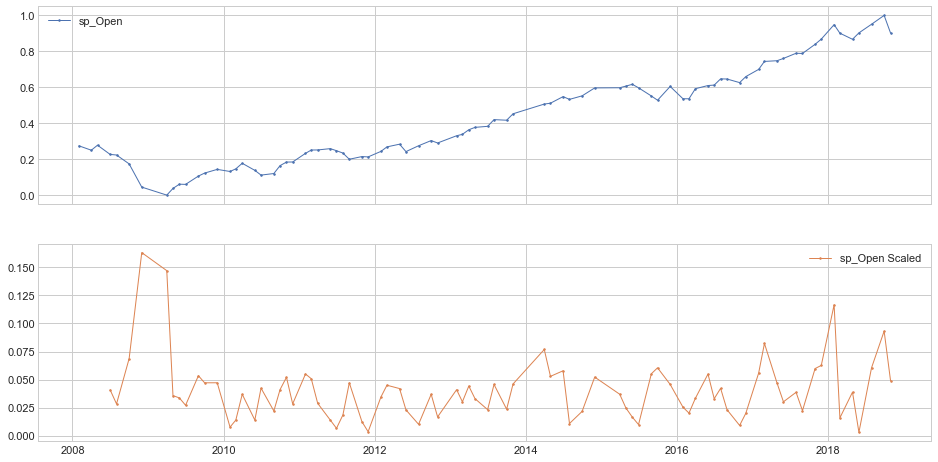

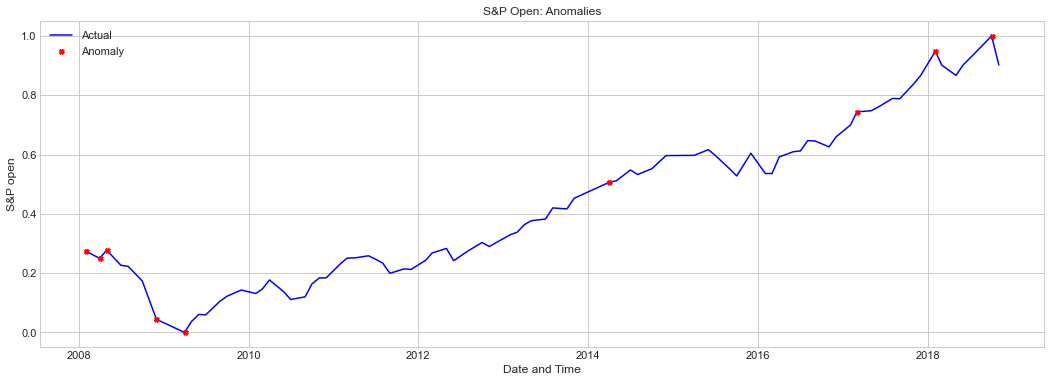

In [123]:
X4 = pd.DataFrame(index = df_final.index, columns = ["sp_Open"], 
                  data = scaler.fit_transform(df_final[["sp_Open"]]))

s_transformed = DoubleRollingAggregate(
    agg="mean", 
    window=(3,1), #The tuple specifies the left window to be 3, and right window to be 1
    diff="l1").transform(X4["sp_Open"]).rename("sp_Open Scaled")


plot(pd.concat([X4["sp_Open"], s_transformed], axis=1), ts_linewidth=1, ts_markersize=3);

SS = s_transformed.to_frame()

SS['sp_Open Scaled'] = SS['sp_Open Scaled'].fillna(0)


models=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
#XV = pd.DataFrame(index = X1.index, columns = ["vix_Open"], data = X1["vix_Open"])
models.fit(SS)
X4['scores']=models.decision_function(SS)
X4['anomaly']=models.predict(SS)

# visualization
aS = X4.loc[X4['anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X4.index, X4['sp_Open'], color='blue', label='Actual')
_ = plt.plot(aS.index, aS['sp_Open'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('S&P open')
_ = plt.title('S&P Open: Anomalies')
_ = plt.legend(loc='best')
plt.show();



In [124]:
outliers_counter = len(X4[X4['sp_Open'] > 0.8])
print("Total outlier points found by IF: ",outliers_counter)
print("Accuracy percentage:", 100*list(X4['anomaly']).count(-1)/(outliers_counter),"%")

Total outlier points found by IF:  9
Accuracy percentage: 100.0 %


# Crude Oil Open Outlier points

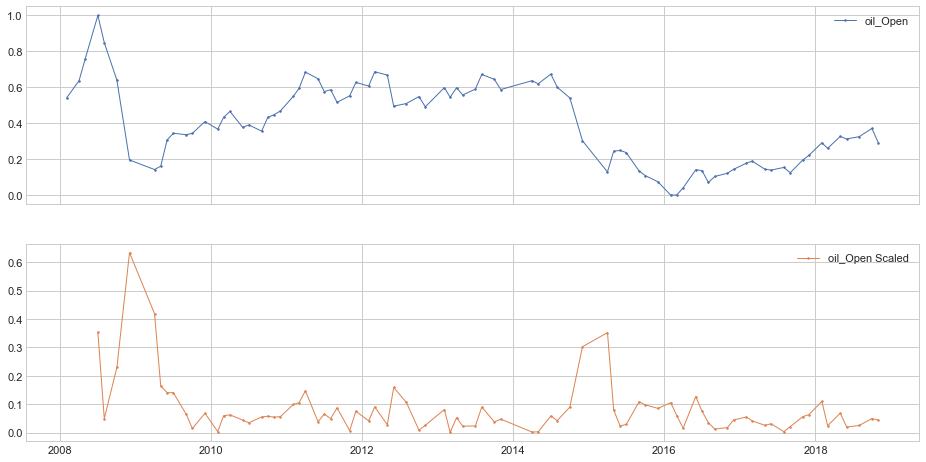

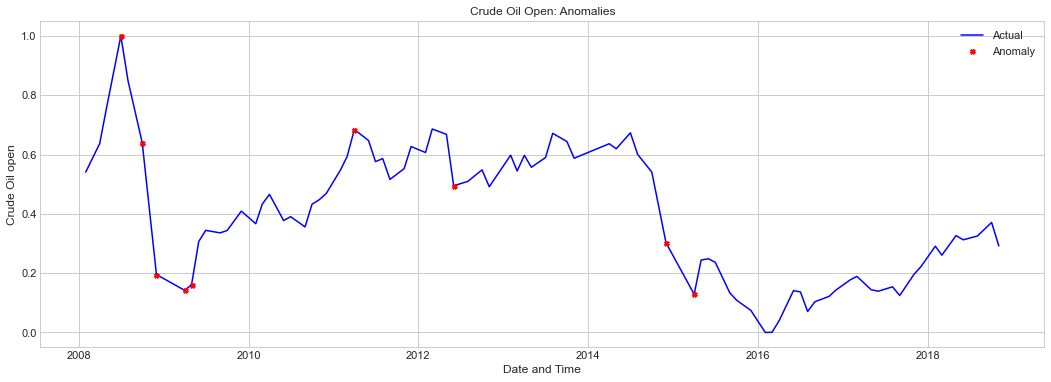

In [125]:
X5 = pd.DataFrame(index = df_final.index, columns = ["oil_Open"], 
                  data = scaler.fit_transform(df_final[["oil_Open"]]))

s_transformed = DoubleRollingAggregate(
    agg="mean", 
    window=(3,1), #The tuple specifies the left window to be 3, and right window to be 1
    diff="l1").transform(X5["oil_Open"]).rename("oil_Open Scaled")


plot(pd.concat([X5["oil_Open"], s_transformed], axis=1), ts_linewidth=1, ts_markersize=3);

SC = s_transformed.to_frame()

SC['oil_Open Scaled'] = SC['oil_Open Scaled'].fillna(0)


modelc=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
#XV = pd.DataFrame(index = X1.index, columns = ["vix_Open"], data = X1["vix_Open"])
modelc.fit(SC)
X5['scores']=modelc.decision_function(SC)
X5['anomaly']=modelc.predict(SC)

# visualization
ac = X5.loc[X5['anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X5.index, X5['oil_Open'], color='blue', label='Actual')
_ = plt.plot(ac.index, ac['oil_Open'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Crude Oil open')
_ = plt.title('Crude Oil Open: Anomalies')
_ = plt.legend(loc='best')
plt.show();



In [126]:
outliers_counter = len(X5[X5['oil_Open'] > 0.645])
print("Total outlier points found by IF: ",outliers_counter)
print("Accuracy percentage:", 100*list(X5['anomaly']).count(-1)/(outliers_counter),"%")

Total outlier points found by IF:  9
Accuracy percentage: 100.0 %


# Save the outlier labeled outlier points in a spreadsheet

In [78]:
with pd.ExcelWriter('OutlierPoints_Processed_Month_C_0.1.xlsx') as writer:
    X1.to_excel(writer, sheet_name='VIXopen')
    X2.to_excel(writer, sheet_name='DOWopen')
    X3.to_excel(writer, sheet_name='GOLDopen')
    X4.to_excel(writer, sheet_name='S&Popen')
    X5.to_excel(writer, sheet_name='OILopen')

In [79]:
df_final.columns

Index(['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Beef_Production_LB', 'Butter_Production_LB', 'Cheese_Production_LB',
       'Chickens_Production_LB', 'Ducks_Production_LB', 'Eggs_Production_EGGS',
       'Ice Cream_Production_GALLONS', 'Lamb and mutton_Production_LB',
       'Milk_Production_LB', 'Other poultry_Production_LB',
       'Pork_Production_LB', 'Sherbet_Production_GALLONS',
       'Total poultry_Production_Million LBS',
       'Total red meat and poultry_Production_Million LBS',
       'Total red meat_Production_Million LBS', 'Turkeys_Production_LB',
       'Veal_Production_LB', 'Water Ices_Production_GALLONS'],
      dtype='object')

# Pairplot (Econ indices vs Beef_Production_LB)

<Figure size 2160x2160 with 0 Axes>

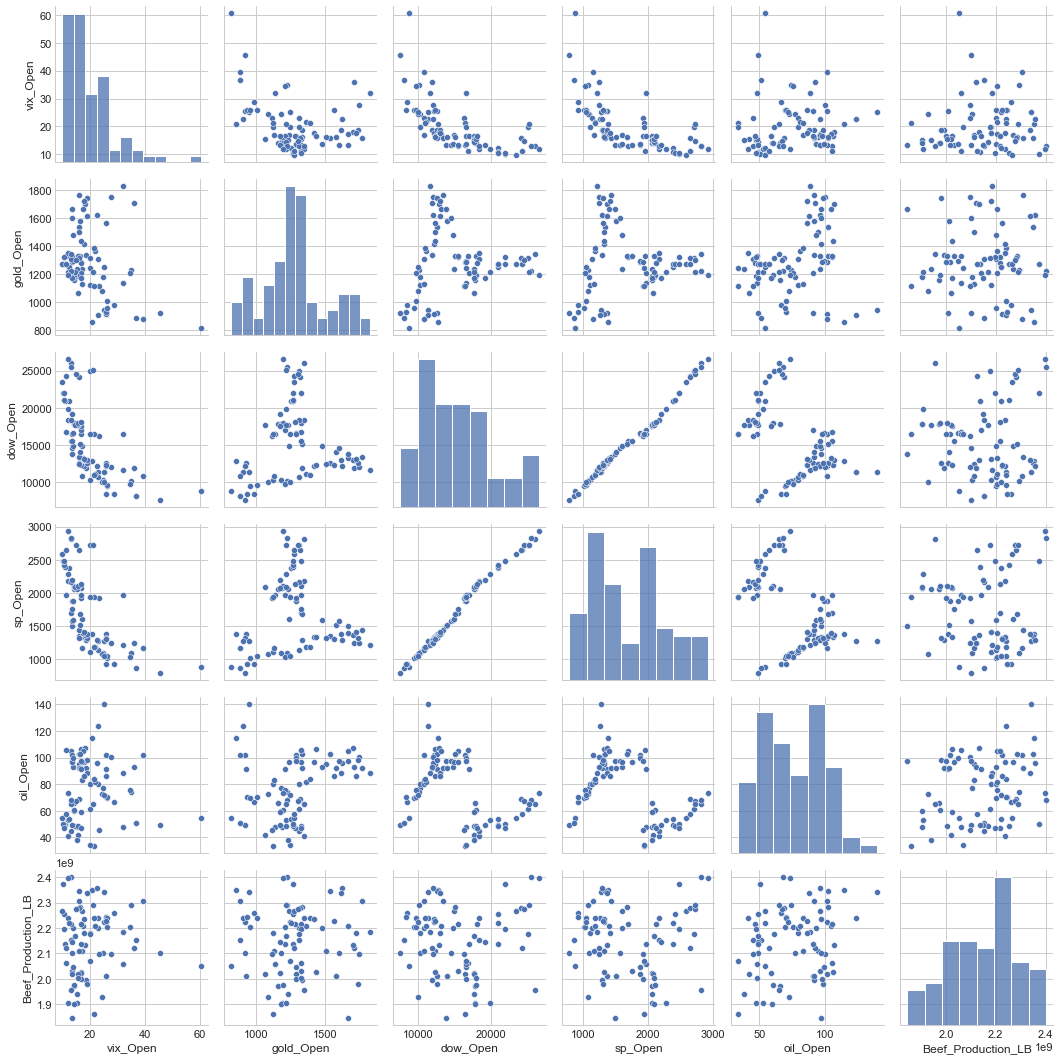

In [83]:

plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Beef_Production_LB']])
plt.show()


# Pairplot (Econ indices vs Butter_Production_LB)

<Figure size 2160x2160 with 0 Axes>

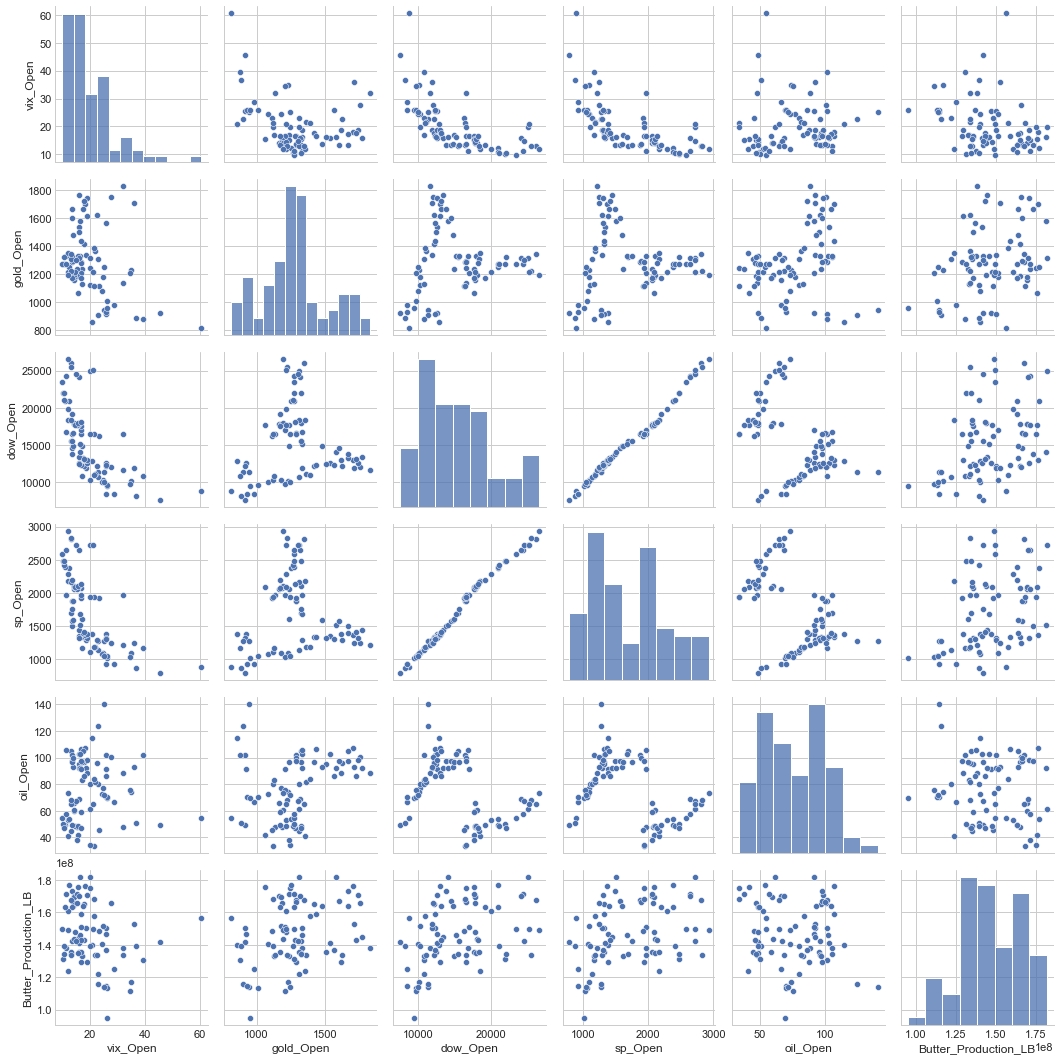

In [84]:

plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Butter_Production_LB']])
plt.show()


# Pairplot (Econ indices vs Cheese_Production_LB)

<Figure size 2160x2160 with 0 Axes>

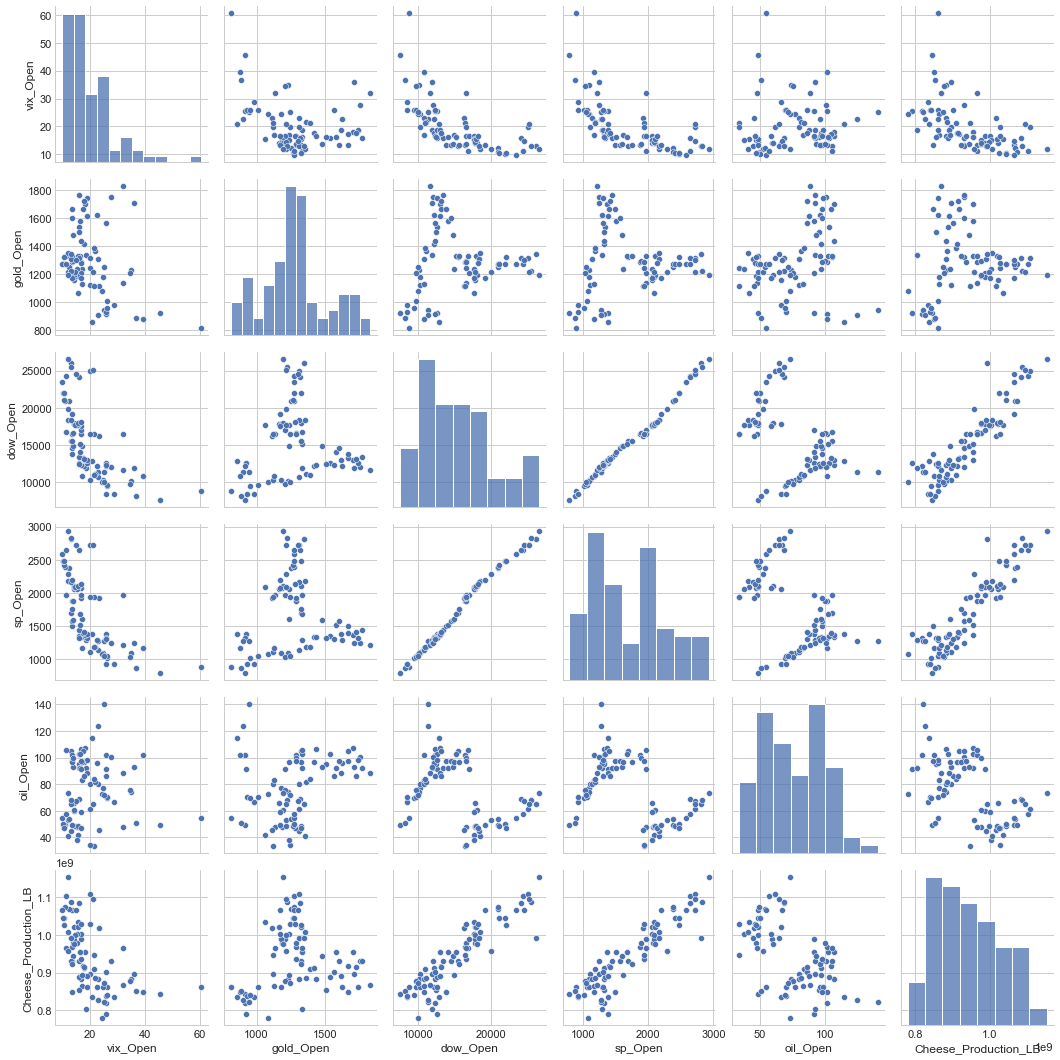

In [85]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Cheese_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Chickens_Production_LB)

<Figure size 2160x2160 with 0 Axes>

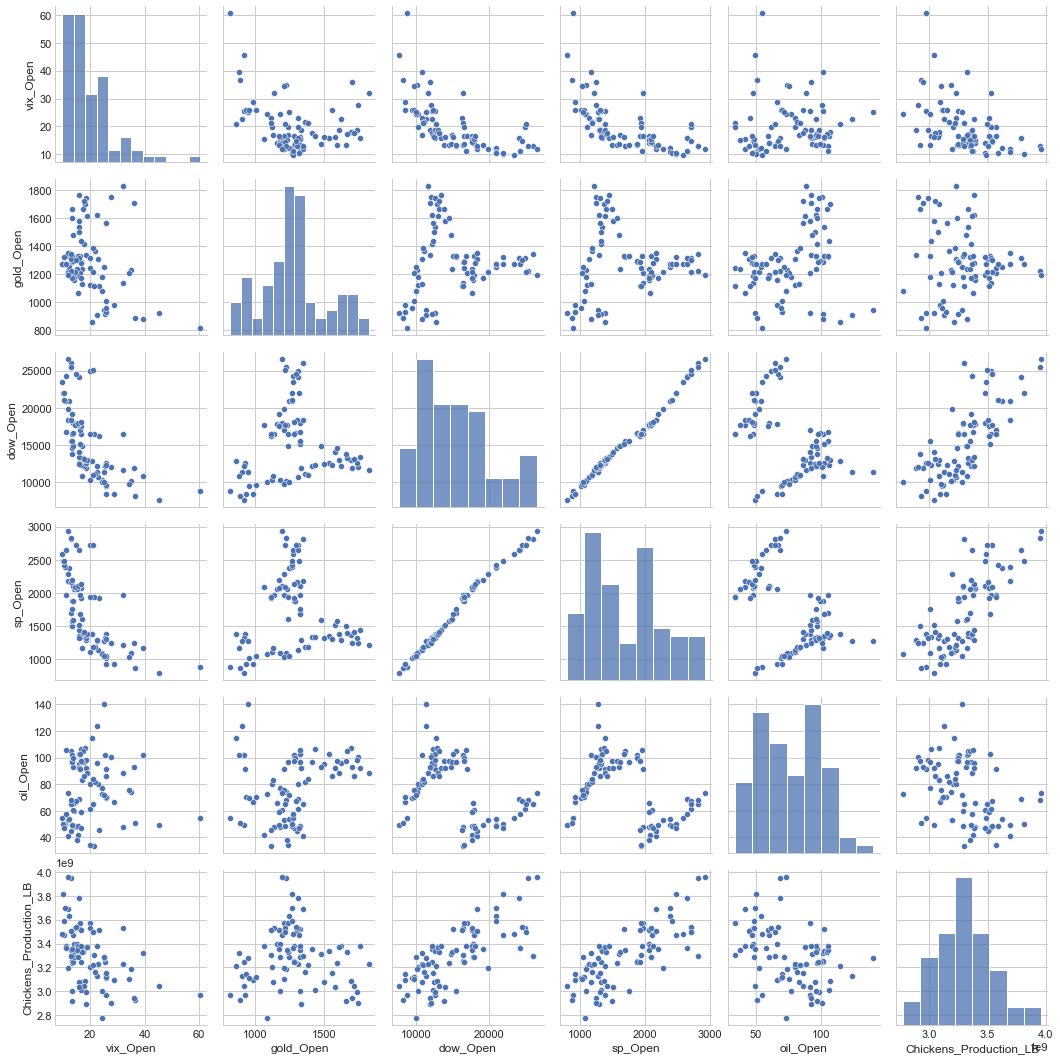

In [86]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Chickens_Production_LB']])
plt.show()

# Pairplot (Econ indices vs , Ducks_Production_LB)

<Figure size 2160x2160 with 0 Axes>

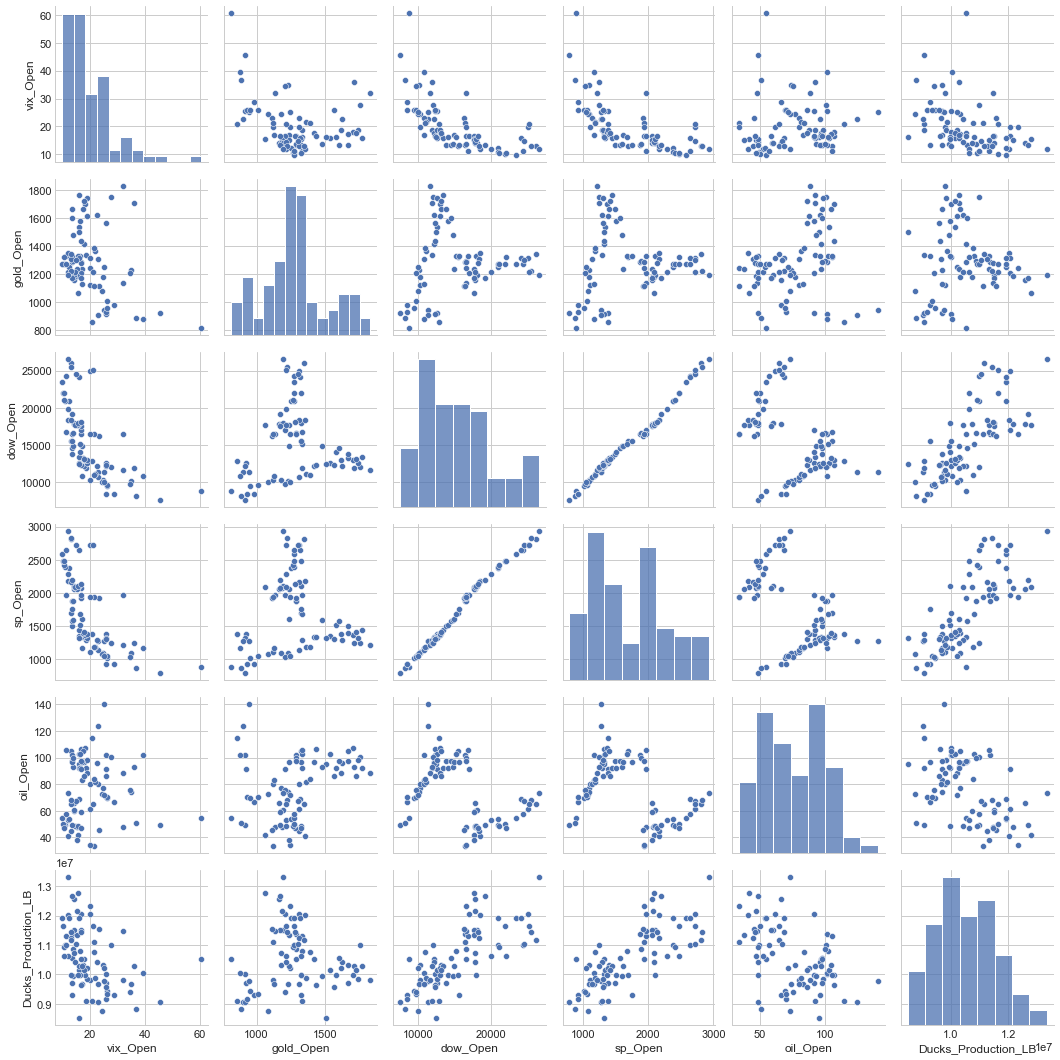

In [87]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Ducks_Production_LB']])
plt.show()

# Pairplot (Econ indices vs , Eggs_Production_EGGS)

<Figure size 2160x2160 with 0 Axes>

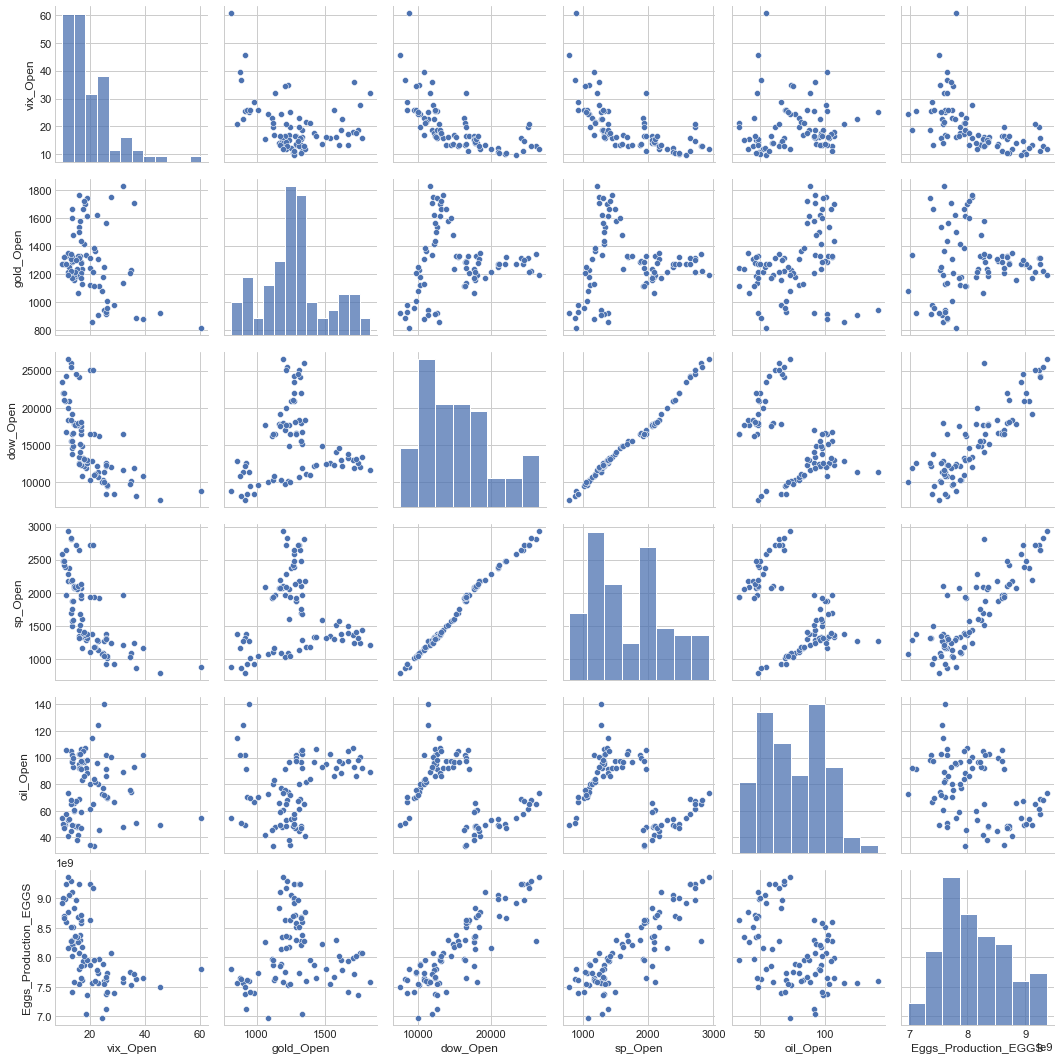

In [88]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Eggs_Production_EGGS']])
plt.show()

# Pairplot (Econ indices vs ,Ice Cream_Production_GALLONS)

<Figure size 2160x2160 with 0 Axes>

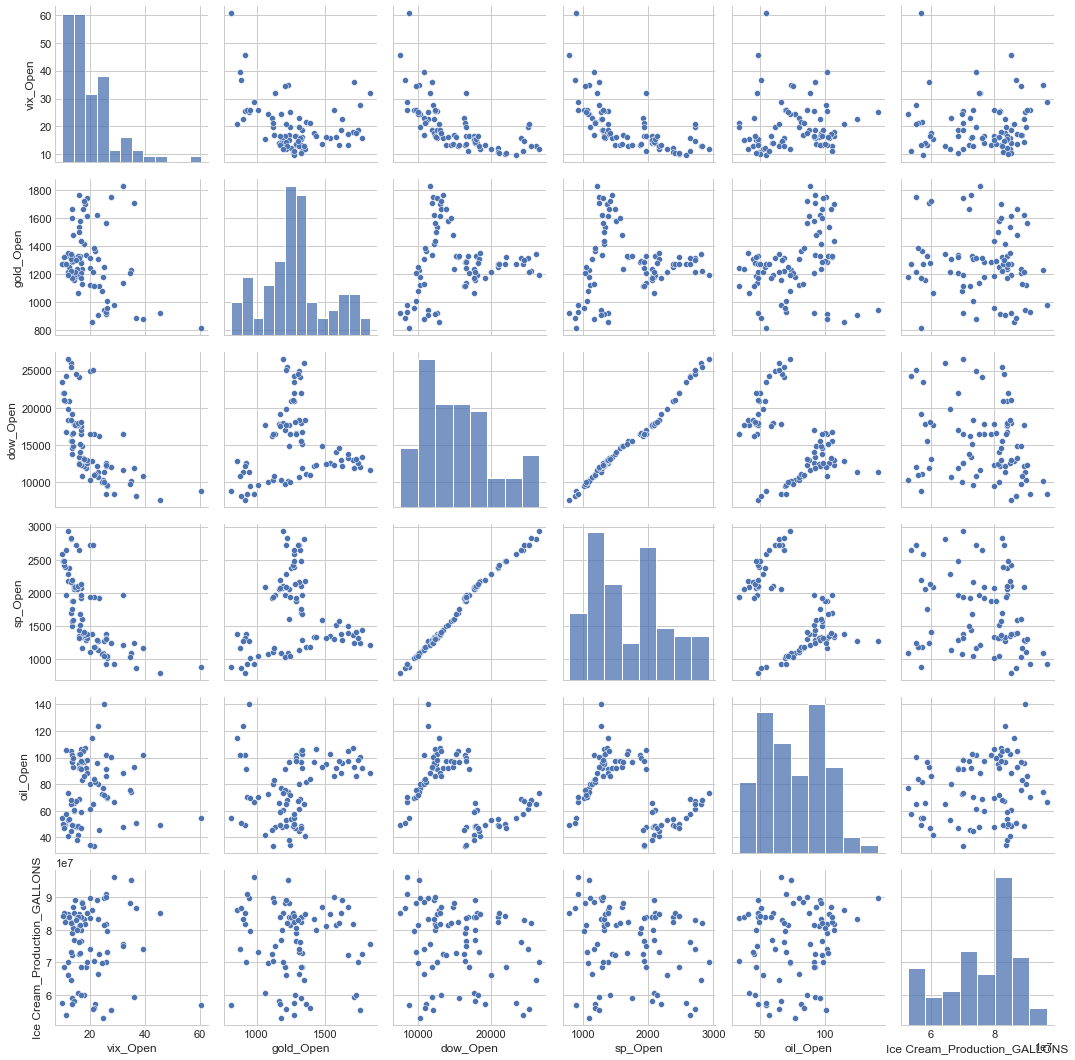

In [89]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Ice Cream_Production_GALLONS']])
plt.show()

# Pairplot (Econ indices vs , Lamb and mutton_Production_LB)

<Figure size 2160x2160 with 0 Axes>

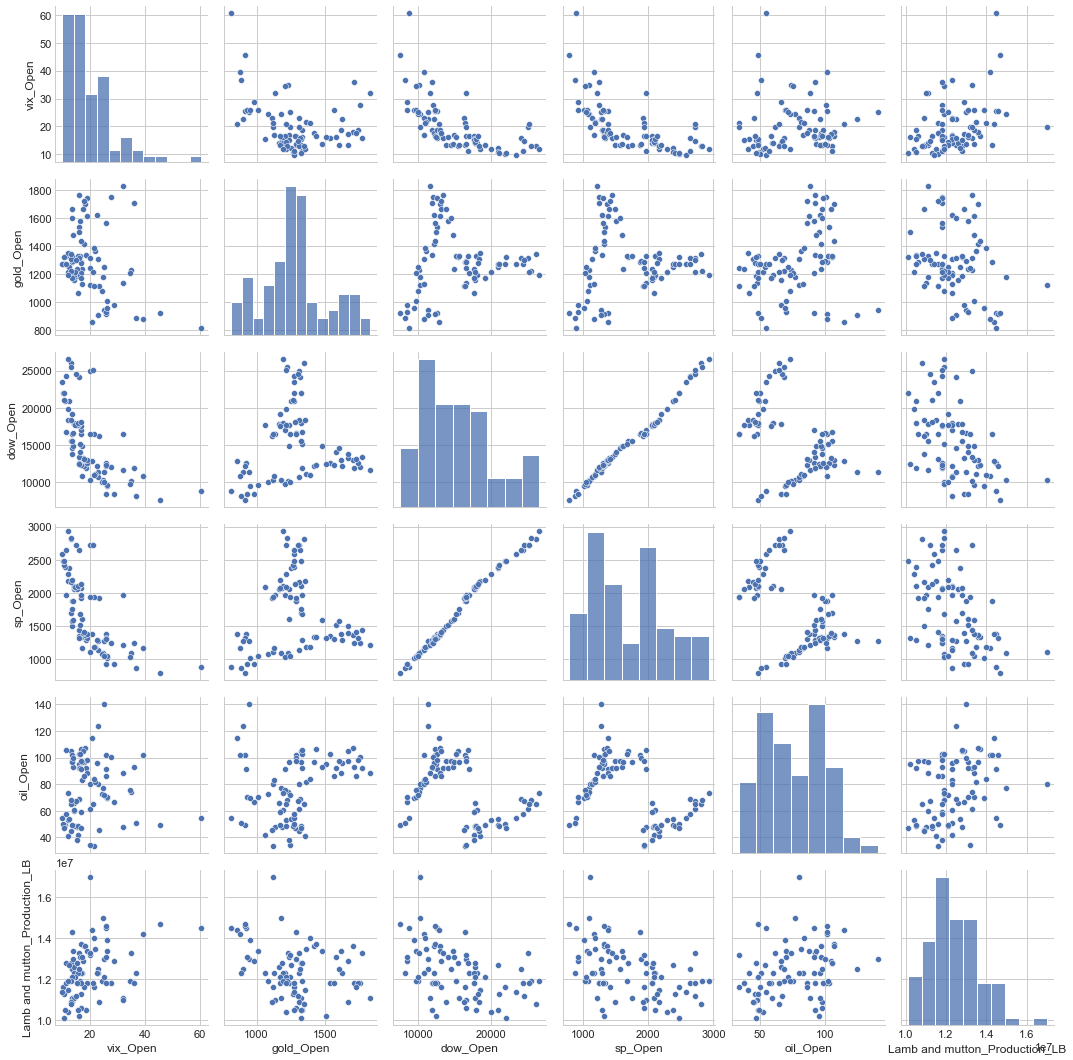

In [90]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Lamb and mutton_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Milk_Production_LB)

<Figure size 2160x2160 with 0 Axes>

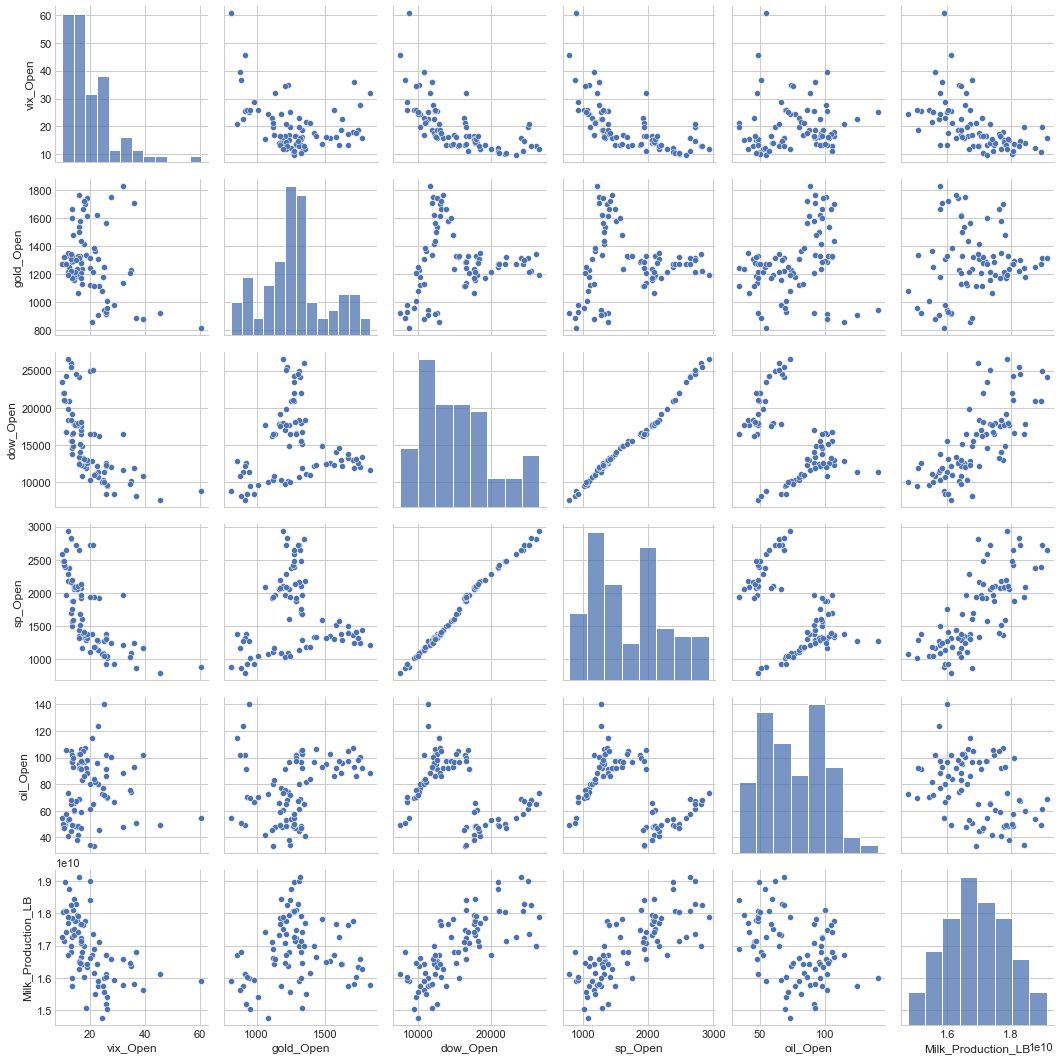

In [91]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Milk_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Other poultry_Production_LB)

<Figure size 2160x2160 with 0 Axes>

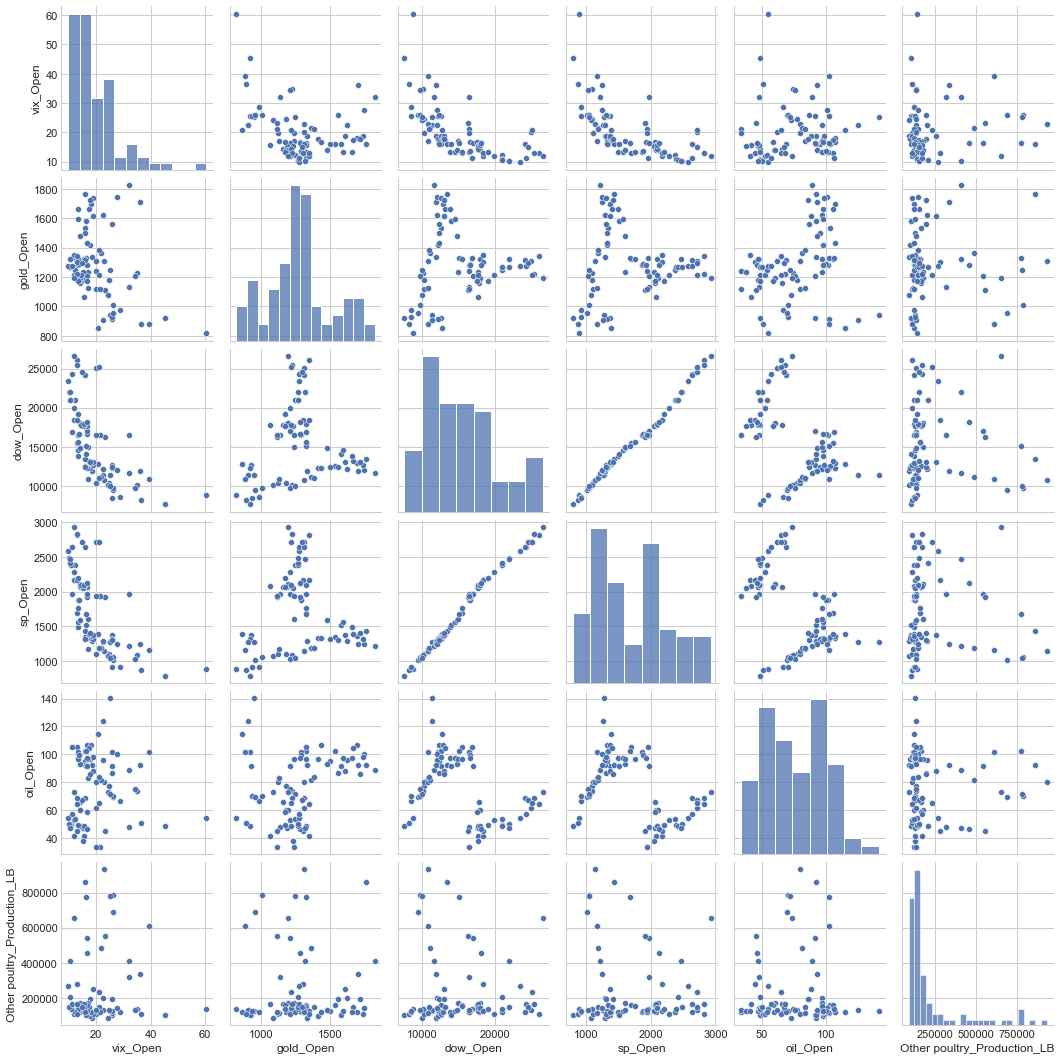

In [92]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Other poultry_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Pork_Production_LB)

<Figure size 2160x2160 with 0 Axes>

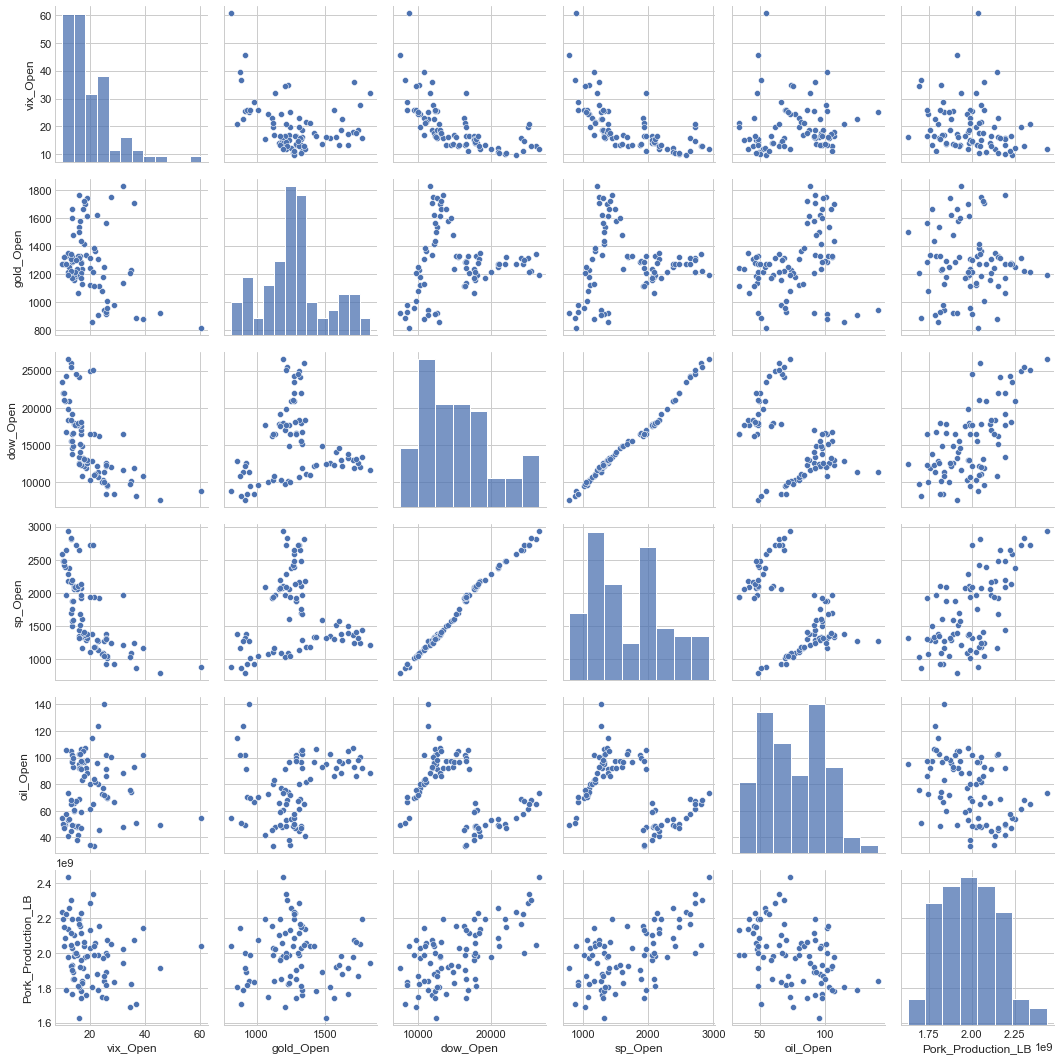

In [93]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Pork_Production_LB']])
plt.show()

# Pairplot (Econ indices vs , Sherbet_Production_GALLONS)

<Figure size 2160x2160 with 0 Axes>

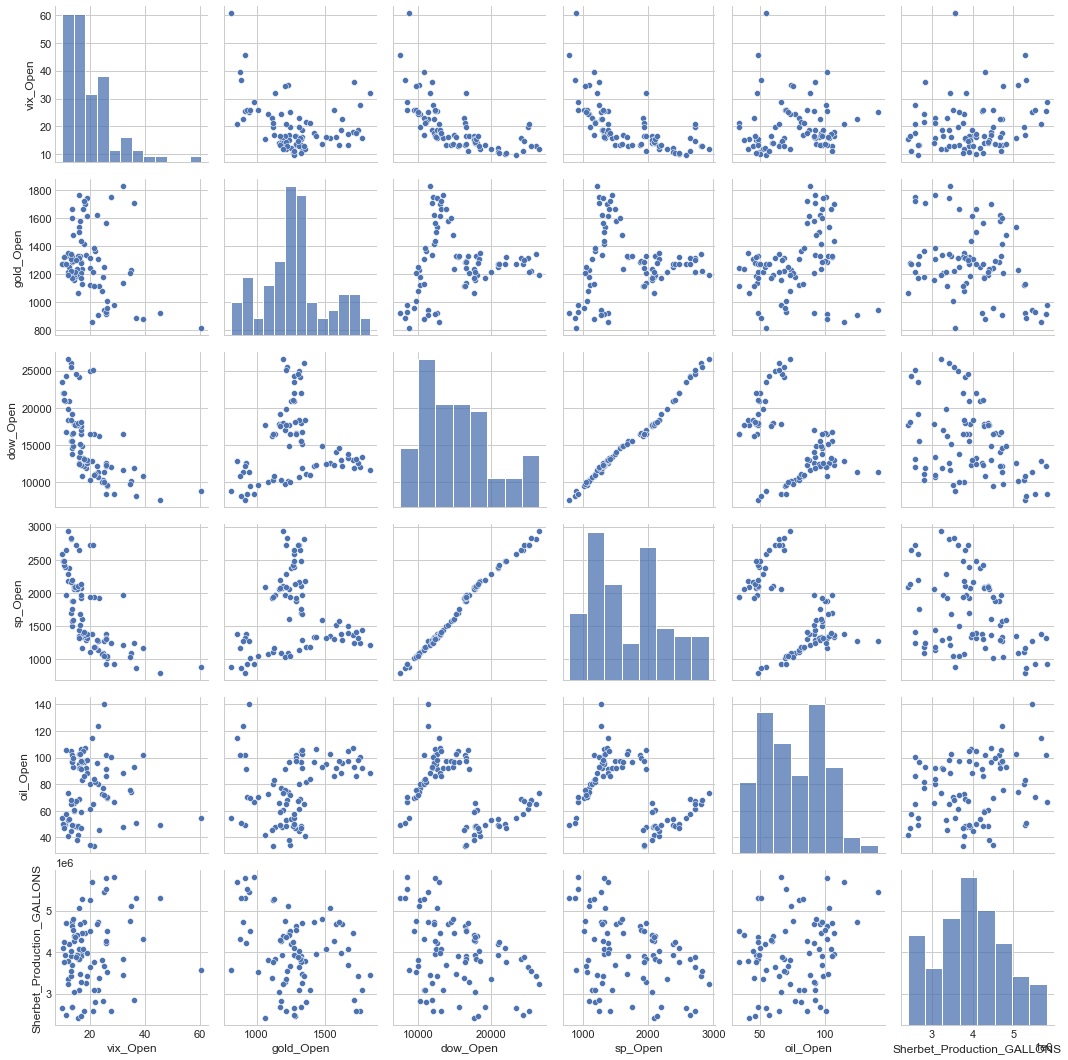

In [94]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Sherbet_Production_GALLONS']])
plt.show()

# Pairplot (Econ indices vs Total poultry_Production_Million LBS)

<Figure size 2160x2160 with 0 Axes>

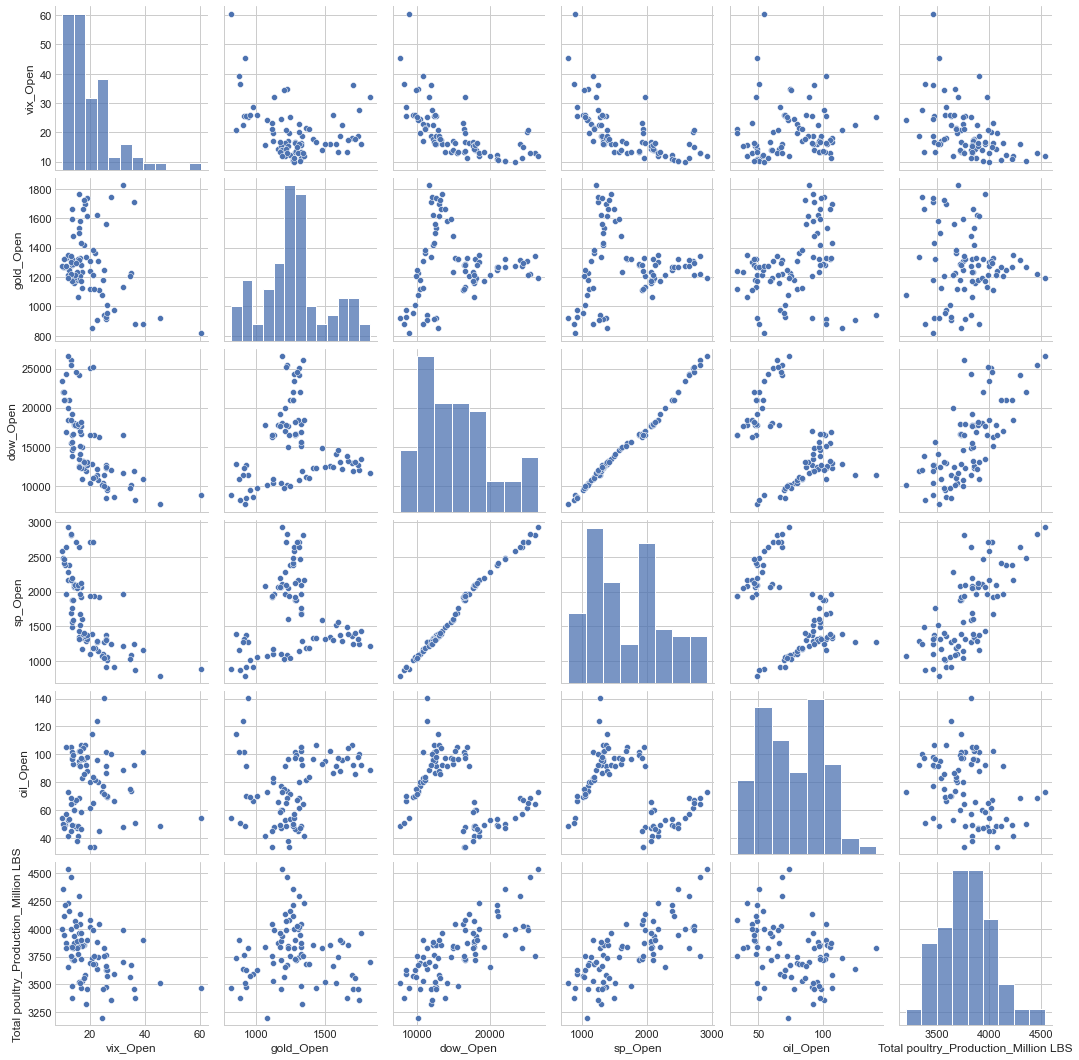

In [95]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Total poultry_Production_Million LBS']])
plt.show()

# Pairplot (Econ indices vs Total red meat and poultry_Production_Million LBS)

<Figure size 2160x2160 with 0 Axes>

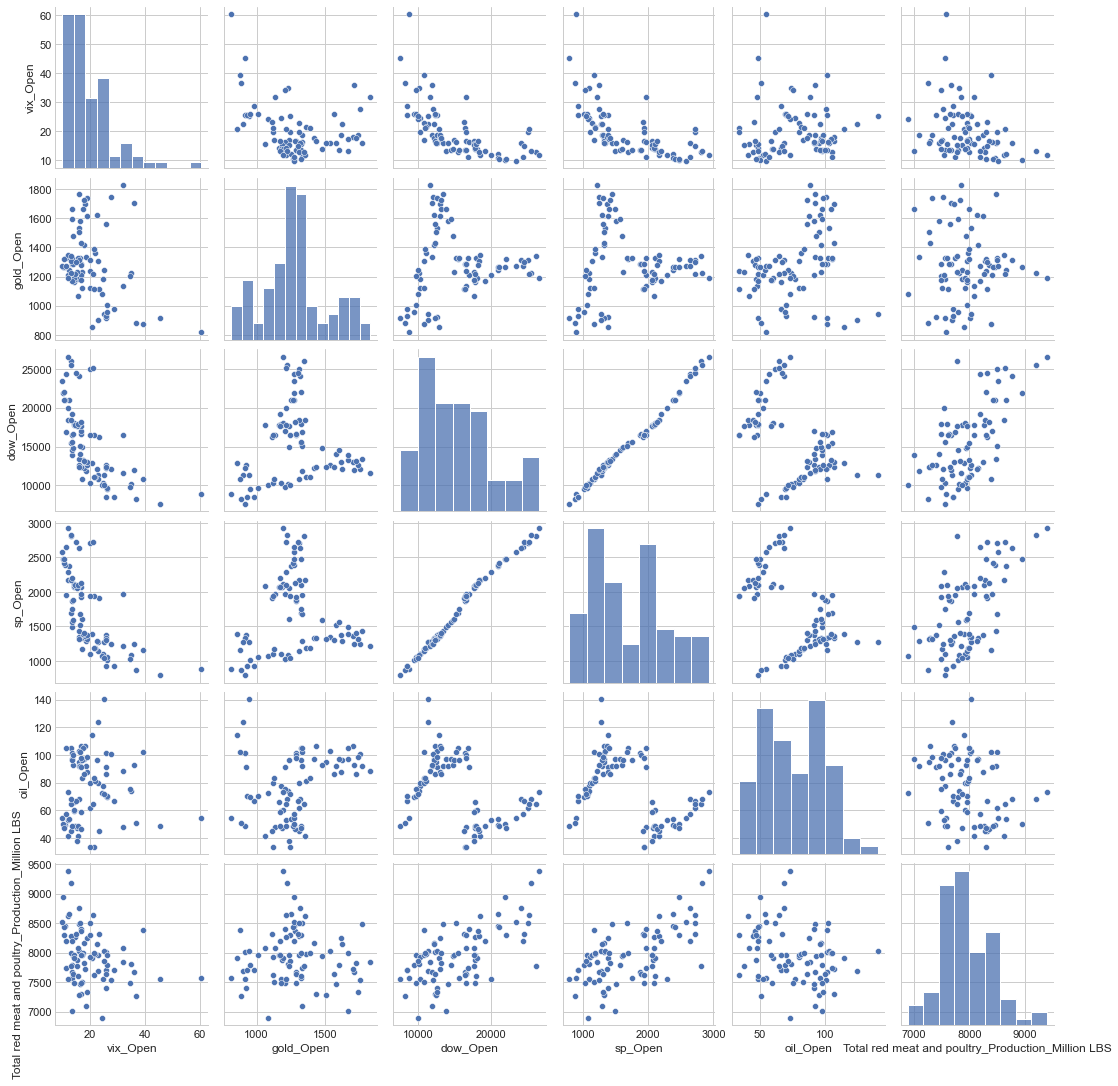

In [96]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Total red meat and poultry_Production_Million LBS']])
plt.show()

# Pairplot (Econ indices vs  Total red meat_Production_Million LBS)

<Figure size 2160x2160 with 0 Axes>

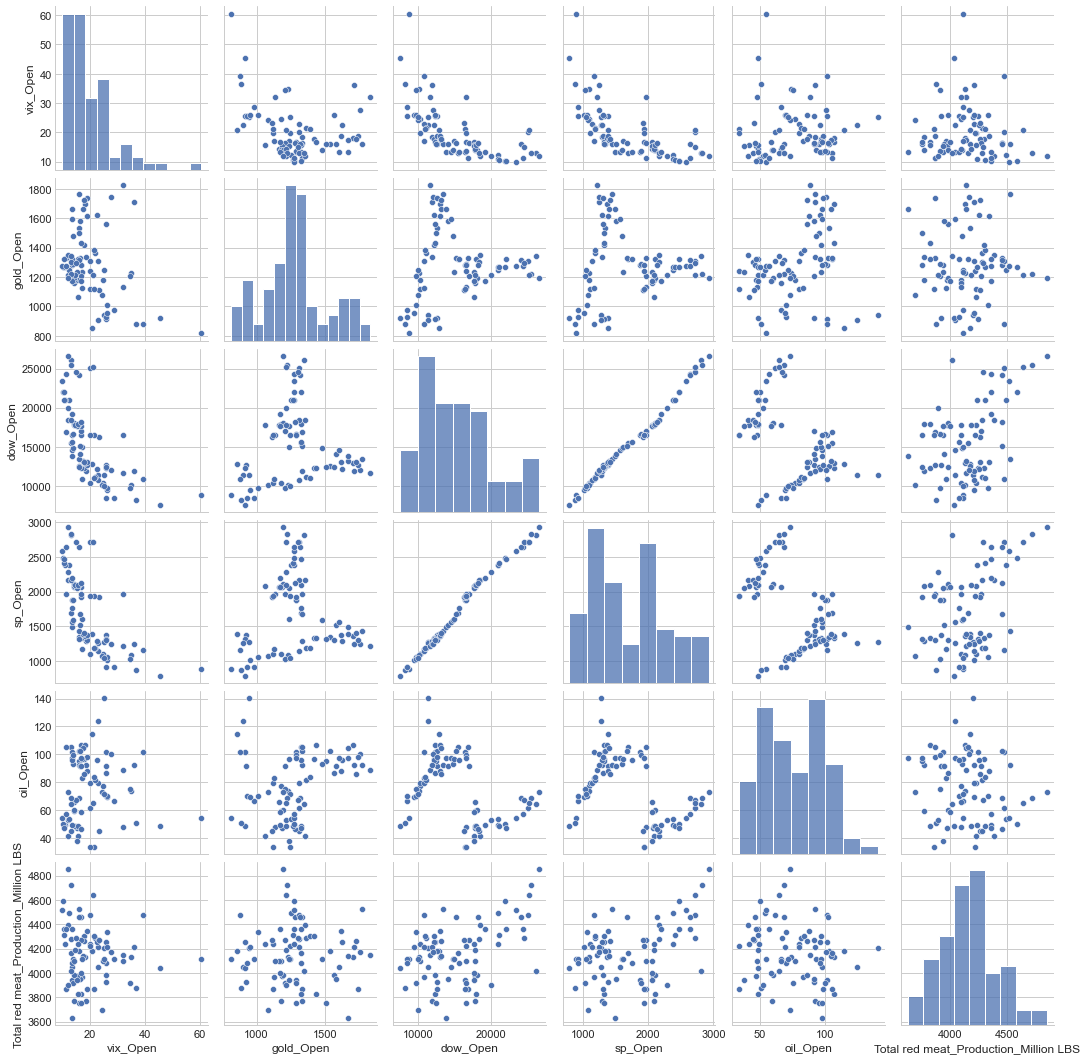

In [97]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Total red meat_Production_Million LBS']])
plt.show()

# Pairplot (Econ indices vs  Turkeys_Production_LB)

<Figure size 2160x2160 with 0 Axes>

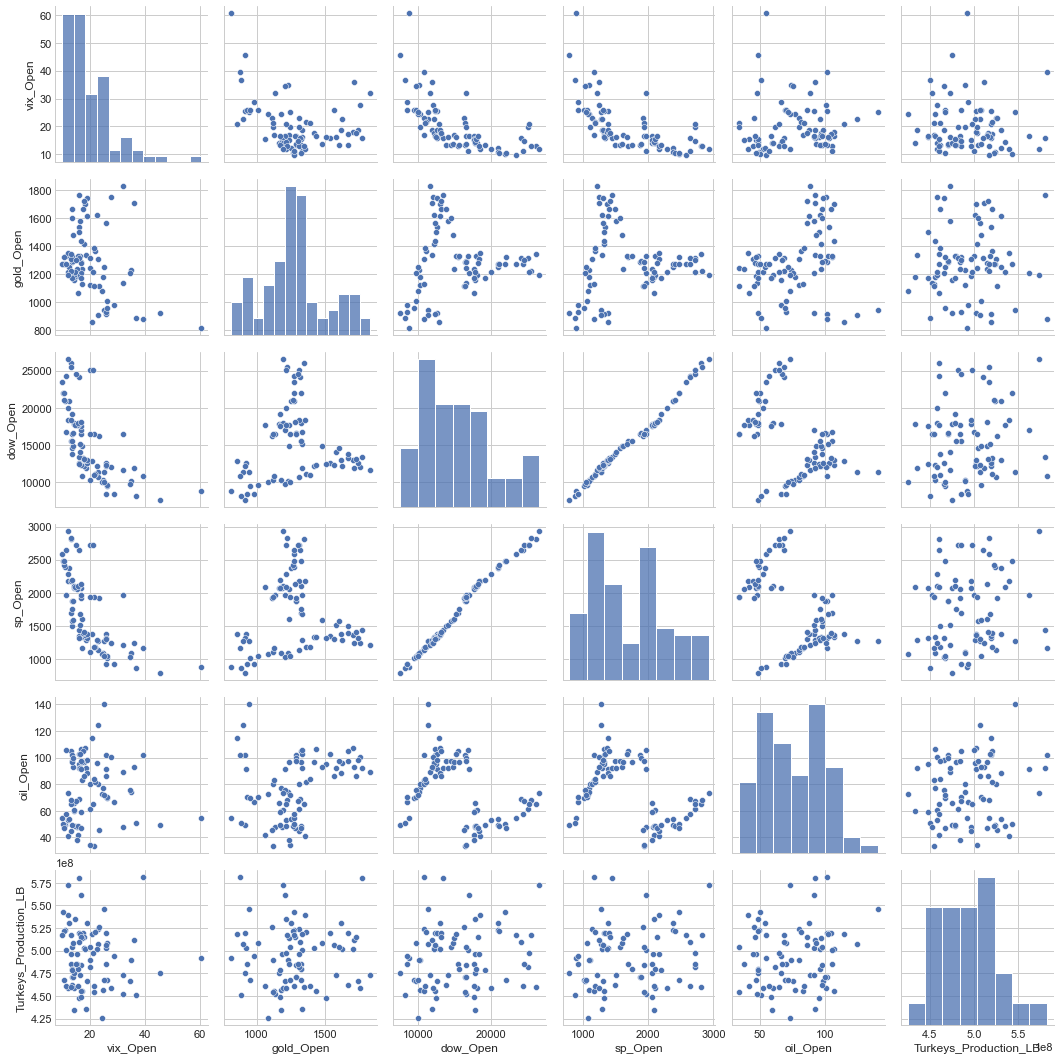

In [98]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Turkeys_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Veal_Production_LB)

<Figure size 2160x2160 with 0 Axes>

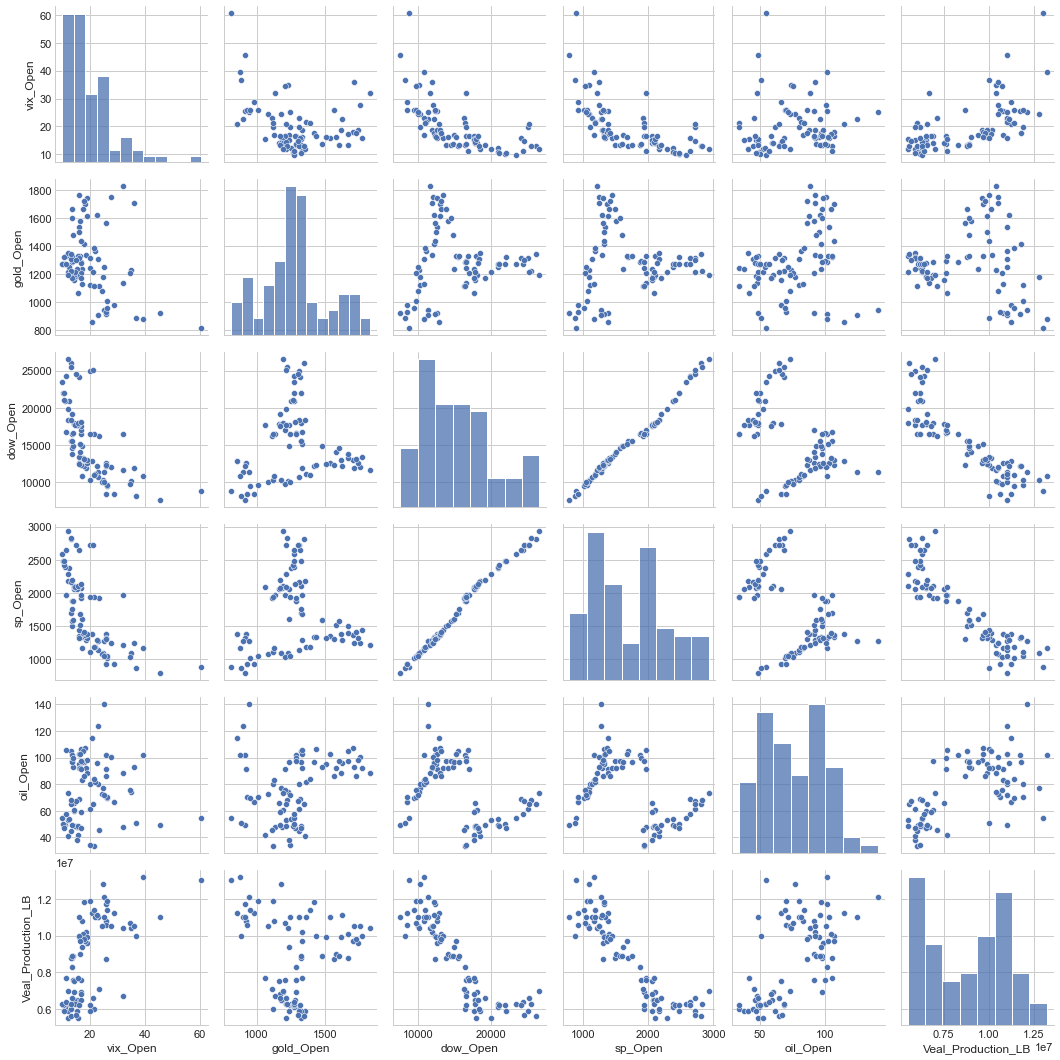

In [99]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Veal_Production_LB']])
plt.show()

# Pairplot (Econ indices vs Water Ices_Production_GALLONS)

<Figure size 2160x2160 with 0 Axes>

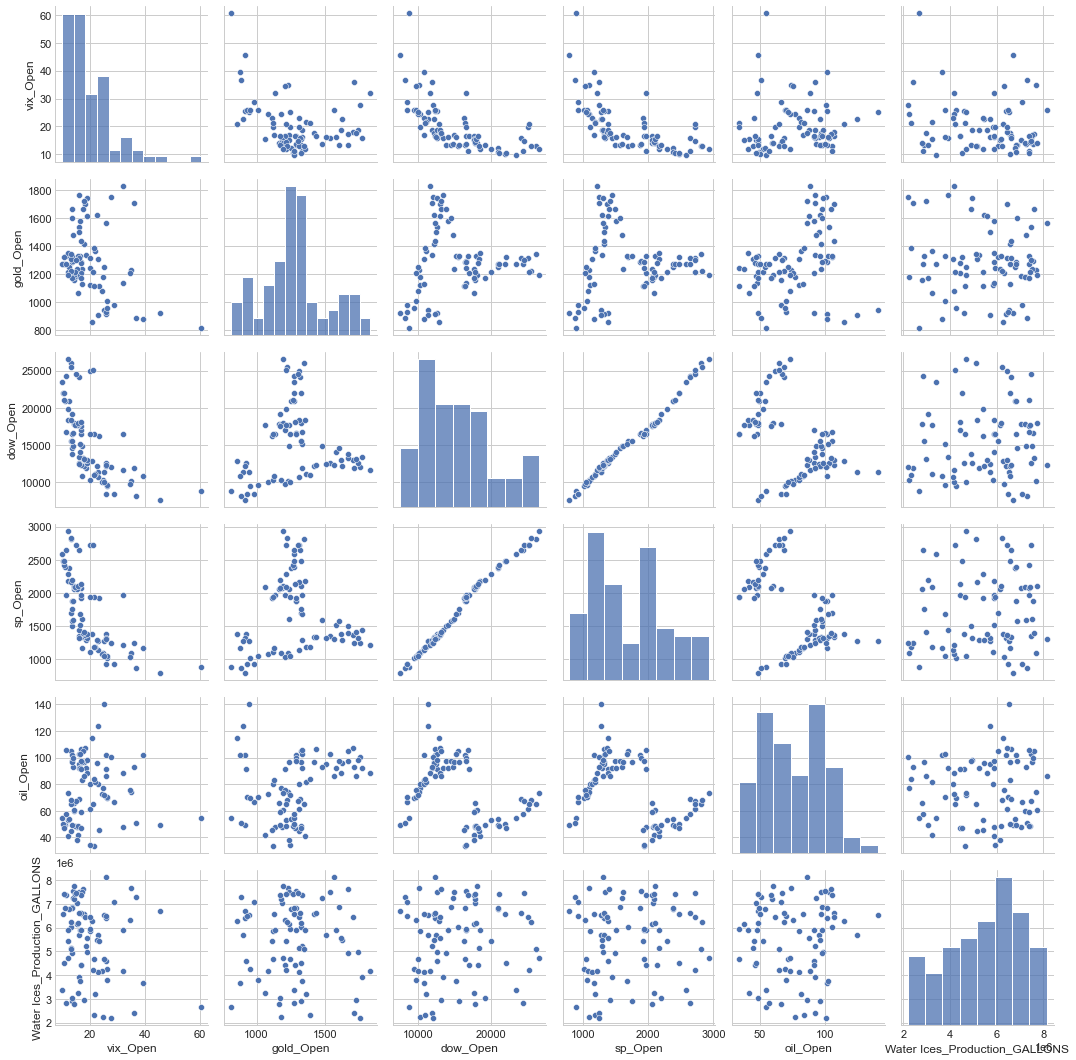

In [100]:
plt.figure()
#cols_to_plot = DF_Final.columns[0:5].tolist()  # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df_final[['vix_Open', 'gold_Open', 'dow_Open', 'sp_Open', 'oil_Open',
       'Water Ices_Production_GALLONS']])
plt.show()

# Correlation Matrix

In [101]:
df_final.corr(method='pearson', min_periods=1)

vix_Open  gold_Open  \
vix_Open                                           1.000000  -0.321834   
gold_Open                                         -0.321834   1.000000   
dow_Open                                          -0.635195   0.074051   
sp_Open                                           -0.648443   0.036030   
oil_Open                                           0.046861   0.276128   
Beef_Production_LB                                 0.066417  -0.010431   
Butter_Production_LB                              -0.297154   0.309890   
Cheese_Production_LB                              -0.549893   0.105913   
Chickens_Production_LB                            -0.468491  -0.046374   
Ducks_Production_LB                               -0.408967   0.021340   
Eggs_Production_EGGS                              -0.537858   0.082664   
Ice Cream_Production_GALLONS                      -0.005137  -0.101917   
Lamb and mutton_Production_LB                      0.371845  -0.295798   
Milk_Production_LB                                -0.537763   0.112791   
Other poultry_Production_LB                        0.103316   0.019679   
Pork_Production_LB                                -0.223903  -0.006841   
Sherbet_Production_GALLONS                         0.190795  -0.329764   
Total poultry_Production_Million LBS              -0.443752  -0.039470   
Total red meat and poultry_Production_Million LBS -0.306851  -0.028901   
Total red meat_Production_Million LBS             -0.110578  -0.012925   
Turkeys_Production_LB                             -0.060659   0.028934   
Veal_Production_LB                                 0.621819  -0.088052   
Water Ices_Production_GALLONS                     -0.187410  -0.066010   

                                                   dow_Open   sp_Open  \
vix_Open                                          -0.635195 -0.648443   
gold_Open                                          0.074051  0.036030   
dow_Open                                           1.000000  0.993678   
sp_Open                                            0.993678  1.000000   
oil_Open                                          -0.417907 -0.460182   
Beef_Production_LB                                 0.008903 -0.032048   
Butter_Production_LB                               0.385625  0.373572   
Cheese_Production_LB                               0.905218  0.912445   
Chickens_Production_LB                             0.747194  0.763381   
Ducks_Production_LB                                0.742329  0.766368   
Eggs_Production_EGGS                               0.853124  0.850904   
Ice Cream_Production_GALLONS                      -0.211417 -0.192908   
Lamb and mutton_Production_LB                     -0.452301 -0.470528   
Milk_Production_LB                                 0.754939  0.767890   
Other poultry_Production_LB                       -0.086000 -0.090651   
Pork_Production_LB                                 0.628288  0.617350   
Sherbet_Production_GALLONS                        -0.379855 -0.365389   
Total poultry_Production_Million LBS               0.712536  0.726608   
Total red meat and poultry_Production_Million LBS  0.624140  0.616041   
Total red meat_Production_Million LBS              0.430105  0.399348   
Turkeys_Production_LB                              0.134379  0.126598   
Veal_Production_LB                                -0.868654 -0.901611   
Water Ices_Production_GALLONS                      0.077354  0.096046   

                                                   oil_Open  \
vix_Open                                           0.046861   
gold_Open                                          0.276128   
dow_Open                                          -0.417907   
sp_Open                                           -0.460182   
oil_Open                                           1.000000   
Beef_Production_LB                                 0.220596   
Butter_Production_LB                              -0.126146   
Cheese_Production

In [104]:
with pd.ExcelWriter('Correlation Matrix.xlsx') as writer:
    df_final.corr(method='pearson', min_periods=1).to_excel(writer, sheet_name='Correlation')